In [14]:
#Importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Importacion del archivo
data_latinoamerica = 'C:/Users/Usuario/OneDrive/Desktop/Henry M4/data_latinoamerica.csv'
#Lectura del archivo, usamos la terminacion _csv ya que es un archivo csv
df_data_latinoamerica = pd.read_csv(data_latinoamerica)
#Usamos el metodo .head() para ver las primeras 5 filas del archivo importado
df_data_latinoamerica.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [16]:
# Verificamos que esten todas las filas y las columnas del archivo
num_filas, num_columnas = df_data_latinoamerica.shape

print(f'Cantidad de registros (filas) : {num_filas}')
print(f'Cantidad de columnas : {num_columnas}')

Cantidad de registros (filas) : 12216057
Cantidad de columnas : 50


In [17]:
# Uso de la funcion .info() para ver las columnas y su tipo de formato
df_data_latinoamerica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   location_key                           object 
 1   date                                   object 
 2   country_code                           object 
 3   country_name                           object 
 4   new_confirmed                          float64
 5   new_deceased                           float64
 6   cumulative_confirmed                   float64
 7   cumulative_deceased                    float64
 8   cumulative_vaccine_doses_administered  float64
 9   population                             float64
 10  population_male                        float64
 11  population_female                      float64
 12  population_rural                       float64
 13  population_urban                       float64
 14  population_density                     float64
 

### Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil

In [18]:
#Filtramos los paises usando la columna 'location_key' ya que si usabamos 'country_name' el filtrado no funcionaba correctamente
paises_filtrados = ['CO', 'AR', 'CL', 'MX', 'PE', 'BR']

df_paises_filtrados = df_data_latinoamerica[df_data_latinoamerica['location_key'].isin(paises_filtrados)]

df_paises_filtrados['location_key'].unique()

array(['AR', 'BR', 'CL', 'CO', 'MX', 'PE'], dtype=object)

In [19]:
#Verificamos que el filtrado sea correcto usando el metodo .unique() para ver si hay de otros paises
df_paises_filtrados['location_key'].unique()

array(['AR', 'BR', 'CL', 'CO', 'MX', 'PE'], dtype=object)

### Filtra los datos en fechas mayores a 2021-01-01

In [20]:
#Antes de hacer el filtrado de datos por fechas, verificamos y configuramos que la columna fecha este en su formato tipo date
df_paises_filtrados['date'].dtype


dtype('O')

In [45]:

df_paises_filtrados['date'] = pd.to_datetime(df_paises_filtrados['date'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1860\4167841419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paises_filtrados['date'] = pd.to_datetime(df_paises_filtrados['date'])


In [117]:
#Ahora si que la columna fecha tiene formato de date, podemos hacer el filtrado de fecha a partir del 2021-01-01

df_filtrado_paises_fecha = df_paises_filtrados[df_paises_filtrados['date']> '2021-01-01']

df_filtrado_paises_fecha

location_key       date country_code country_name  new_confirmed  \
367                AR 2021-01-02           AR    Argentina         7767.0   
368                AR 2021-01-03           AR    Argentina         4934.0   
369                AR 2021-01-04           AR    Argentina        13953.0   
370                AR 2021-01-05           AR    Argentina        14085.0   
371                AR 2021-01-06           AR    Argentina        14496.0   
...               ...        ...          ...          ...            ...   
10253872           PE 2022-09-13           PE         Peru         1150.0   
10253873           PE 2022-09-14           PE         Peru            NaN   
10253874           PE 2022-09-15           PE         Peru            NaN   
10253875           PE 2022-09-16           PE         Peru            NaN   
10253876           PE 2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
367              166.0             1670634.0              46688.0   
368              157.0             1675568.0              46845.0   
369              157.0             1689521.0              47002.0   
370              160.0             1703606.0              47162.0   
371              131.0             1718102.0              47293.0   
...                ...                   ...                  ...   
10253872          22.0             4127612.0             216173.0   
10253873           NaN                   NaN                  NaN   
10253874           NaN                   NaN                  NaN   
10253875           NaN                   NaN                  NaN   
10253876           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
367                                     20334.0  44938712.0  ...   
368                                     20529.0  44938712.0  ...   
369                                     25164.0  44938712.0  ...   
370                                     29852.0  44938712.0  ...   
371                                     34162.0  44938712.0  ...   
...                                         ...         ...  ...   
10253872                                    NaN  29381884.0  ...   
10253873                                    NaN  29381884.0  ...   
10253874                                    NaN  29381884.0  ...   
10253875                                    NaN  29381884.0  ...   
10253876                                    NaN  29381884.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367                    15057273.0         2690269.0           55032.0   
368                    15057273.0         2690269.0           55032.0   
369                    15057273.0         2690269.0           55032.0   
370                    15057273.0         2690269.0           55032.0   
371                    15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
10253872               10554712.0         1256339.0           16425.0   
10253873               10554712.0         1256339.0           16425.0   
10253874               10554712.0         1256339.0           16425.0   
10253875               10554712.0         1256339.0           16425.0   
10253876               10554712.0         1256339.0           16425.0   

          life_expectancy  adult_male_mortality_rate  \
367                76.520                    147.086   
368                76.520                    147.086   
369                76.520                    147.086   
370                76.520                    147.086   
371                76.520                    147.086   
...                   ...                        ...   
10253872           76.516                    146.370   
10253873           76.516                    146.370   
10253874           76.516                    146.370   
1

### Compara a nivel de país para llenar valores faltantes.

In [47]:
#Contamos valores faltantes 
valores_nulos = df_filtrado_paises_fecha.isnull().sum()[df_filtrado_paises_fecha.isnull().sum()> 0]
print(valores_nulos)
print(np.shape(df_filtrado_paises_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


### Realiza una limpieza preliminar de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario, trata con valores medios, valores anteriores o valores siguientes.

In [64]:
# Creamos un diccionario con las columnas que vamos a usar. Ya que ademas si deseamos agregar mas columnas es menos complicado
rellenar_columnas = {
    'new_confirmed': 'new_confirmed',
    'new_deceased': 'new_deceased',
    'cumulative_confirmed': 'cumulative_confirmed',
    'cumulative_deceased': 'cumulative_deceased',
    'rainfall_mm': 'rainfall_mm',
    'relative_humidity': 'relative_humidity',
    'average_temperature_celsius': 'average_temperature_celsius',
    'minimum_temperature_celsius': 'minimum_temperature_celsius',
    'maximum_temperature_celsius': 'maximum_temperature_celsius'
}

# A las columnas que tienen pocos valores null, sacamos el promedio usando una funcion lambda y las rellenamos usando el metodo .fillna()

for columna, _ in rellenar_columnas.items():#.items() lo usamos por las dudas si en algun momento necesitamos acceder a otros elementos
    df_filtrado_paises_fecha[columna] = df_filtrado_paises_fecha.groupby('country_name')[columna].transform( 
        lambda x: x.fillna(x.mean())
    )
#Usamos groupby() junto con transform() para que tome cada columna y luego haga el promedio de esa columna, para que finalmente llene los lugares vacios con el promedio
#no usamos fillna solo por que tomaria toda las columnas y haria un promedio de todas las columnas, lo cual estaria mal el calculo

# Donde vemos que hay muchos valores null, decidimos rellenarlos con 0
columnas_con_ceros = ['new_recovered', 'cumulative_recovered', 'cumulative_vaccine_doses_administered'] #Aqui decimos por que columnas va a iterar
df_filtrado_paises_fecha[columnas_con_ceros] = df_filtrado_paises_fecha[columnas_con_ceros].fillna(0) #Aqui le decimos que los espacios null, los llene con 0

df_filtrado_paises_fecha

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1860\2599561633.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_paises_fecha[columna] = df_filtrado_paises_fecha.groupby('country_name')[columna].transform(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1860\2599561633.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_paises_fecha[columna] = df_filtrado_paises_fecha.groupby('country_name')[columna].transform(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1860\2599561633.py:17: Set

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru    5032.183871   
2022-09-15           PE           PE         Peru    5032.183871   
2022-09-16           PE           PE         Peru    5032.183871   
2022-09-17           PE           PE         Peru    5032.183871   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    197.233871          2.576906e+06        188954.366129   
2022-09-15    197.233871          2.576906e+06        188954.366129   
2022-09-16    197.233871          2.576906e+06        188954.366129   
2022-09-17    197.233871          2.576906e+06        188954.366129   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-13       14450757.0  ...               10554712.0         1256339.0   
2022-09-14       14450757.0  ...               10554712.0         1256339.0   
2022-09-15       14450757.0  ...               10554712.0         1256339.0   
2022-09-16       14450757.0  ...               10554712.0         1256339.0   
2022-09-17       14450757.0  ...               10554712.0         1256339.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0           76.520                    147.086   
2021-01-03           55032.0           76.520                    147.086   
2021-01-04           550

In [65]:

print(df_filtrado_paises_fecha.isnull().sum())

location_key                             0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_age_70_79                     0
population_

In [49]:
#Verificamos que todos los datos estan llenos con el promedio o con 0.
valores_nulos = df_filtrado_paises_fecha.isnull().sum()[df_filtrado_paises_fecha.isnull().sum()> 0]
print(valores_nulos)
print(np.shape(df_filtrado_paises_fecha))


Series([], dtype: int64)
(3744, 50)


### Guardamos el archivo para evitar cargar el archivo csv original.

In [26]:
df_filtrado_paises_fecha.to_csv("DatosFinalesFiltrados.csv",index=False)

In [27]:
#Podemos reiniciar el notebook para liberar memoria y cargar el archivo filtrado para continuar con el analisis
df_filtrado_paises_fecha=pd.read_csv('DatosFinalesFiltrados.csv', sep=',')
df_filtrado_paises_fecha

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru    5032.183871   
3741           PE  2022-09-15           PE         Peru    5032.183871   
3742           PE  2022-09-16           PE         Peru    5032.183871   
3743           PE  2022-09-17           PE         Peru    5032.183871   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.000000          1.670634e+06         46688.000000   
1       157.000000          1.675568e+06         46845.000000   
2       157.000000          1.689521e+06         47002.000000   
3       160.000000          1.703606e+06         47162.000000   
4       131.000000          1.718102e+06         47293.000000   
...            ...                   ...                  ...   
3739     22.000000          4.127612e+06        216173.000000   
3740    197.233871          2.576906e+06        188954.366129   
3741    197.233871          2.576906e+06        188954.366129   
3742    197.233871          2.576906e+06        188954.366129   
3743    197.233871          2.576906e+06        188954.366129   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    0.0  29381884.0  ...   
3740                                    0.0  29381884.0  ...   
3741                                    0.0  29381884.0  ...   
3742                                    0.0  29381884.0  ...   
3743                                    0.0  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

### Aplica bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default

In [28]:
for i in df_filtrado_paises_fecha.columns:#Creamos una variable temporal 'i' para que vaya iterando columna por columna en el df que le pasamos 
    print(i) #Aqui nos va a devolver el nombre de la columna
    print(df_filtrado_paises_fecha[i].describe()) #Y aqui nos da un describe de cada columna que vaya iterando la variable temporal 'i' 
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25% 

### Crea una función que permita obtener la mediana, varianza y el rango. Te dejamos algunas preguntas para analizar esas medidas

In [29]:
def datos_faltantes(df_filtrado_paises_fecha):
    for i in df_filtrado_paises_fecha.columns: #Creamos una variable temporal para que recorra todas las columnas del dataframe
        if df_filtrado_paises_fecha[i].dtype== 'float64' or df_filtrado_paises_fecha[i].dtype== 'int64': #Ponemos una condicion para que haga el analisis sobre los float y los int
            print(i)# Muestra el nombre de la columna que esta iterando
            print('Mediana: ', df_filtrado_paises_fecha[i].median())#Saca la mediana de la columna donde esta iterando y la muestra en el print
            print('Varianza: ', df_filtrado_paises_fecha[i].var())#Saca la varianza de la columna donde esta iterando y la muestra en el print
            print('Rango: ', df_filtrado_paises_fecha[i].max() - df_filtrado_paises_fecha[i].min())#Saca el rango de la columna donde esta iterando y la muestra en el print
            print('Moda: ', df_filtrado_paises_fecha[i].mode())#Saca la moda de la columna donde esta iterando y la muestra en el print
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
datos_faltantes(df_filtrado_paises_fecha)

new_confirmed
Mediana:  5214.0
Varianza:  586577465.58212
Rango:  298981.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
new_deceased
Mediana:  100.5
Varianza:  257292.4462981465
Rango:  11447.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative_confirmed
Mediana:  3632143.5
Varianza:  63828420109841.22
Rango:  34567862.0
Moda:  0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
~~~~~~~~~~~~~~~~~~~~~

### Avance 2

In [121]:
df_filtrado_paises_fecha = pd.read_csv('DatosFinalesFiltrados.csv')

In [122]:
df_filtrado_paises_fecha.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13921.908931    276.887411          6.777074e+06        192957.902075   
std     24219.361378    507.240028          7.989269e+06        182798.790565   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59255.750000   
50%      5214.000000    100.500000          3.632144e+06        139614.000000   
75%     14834.000000    312.000000          6.223497e+06        214939.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            6.544474e+07  7.772147e+07     3.787035e+07   
std                             9.247680e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             2.618297e+06  2.938188e+07     1.445076e+07   
50%                             3.244576e+07  4.791080e+07     2.225416e+07   
75%                             7.478108e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          3.894398e+06  
std                      1.665972   23

In [123]:
print(df_filtrado_paises_fecha.dtypes)



location_key                              object
date                                      object
country_code                              object
country_name                              object
new_confirmed                            float64
new_deceased                             float64
cumulative_confirmed                     float64
cumulative_deceased                      float64
cumulative_vaccine_doses_administered    float64
population                               float64
population_male                          float64
population_female                        float64
population_rural                         float64
population_urban                         float64
population_density                       float64
human_development_index                  float64
population_age_00_09                     float64
population_age_10_19                     float64
population_age_20_29                     float64
population_age_30_39                     float64
population_age_40_49

In [124]:
df_filtrado_paises_fecha['date'] = pd.to_datetime(df_filtrado_paises_fecha['date'])
df_filtrado_paises_fecha.set_index('date', inplace=True)

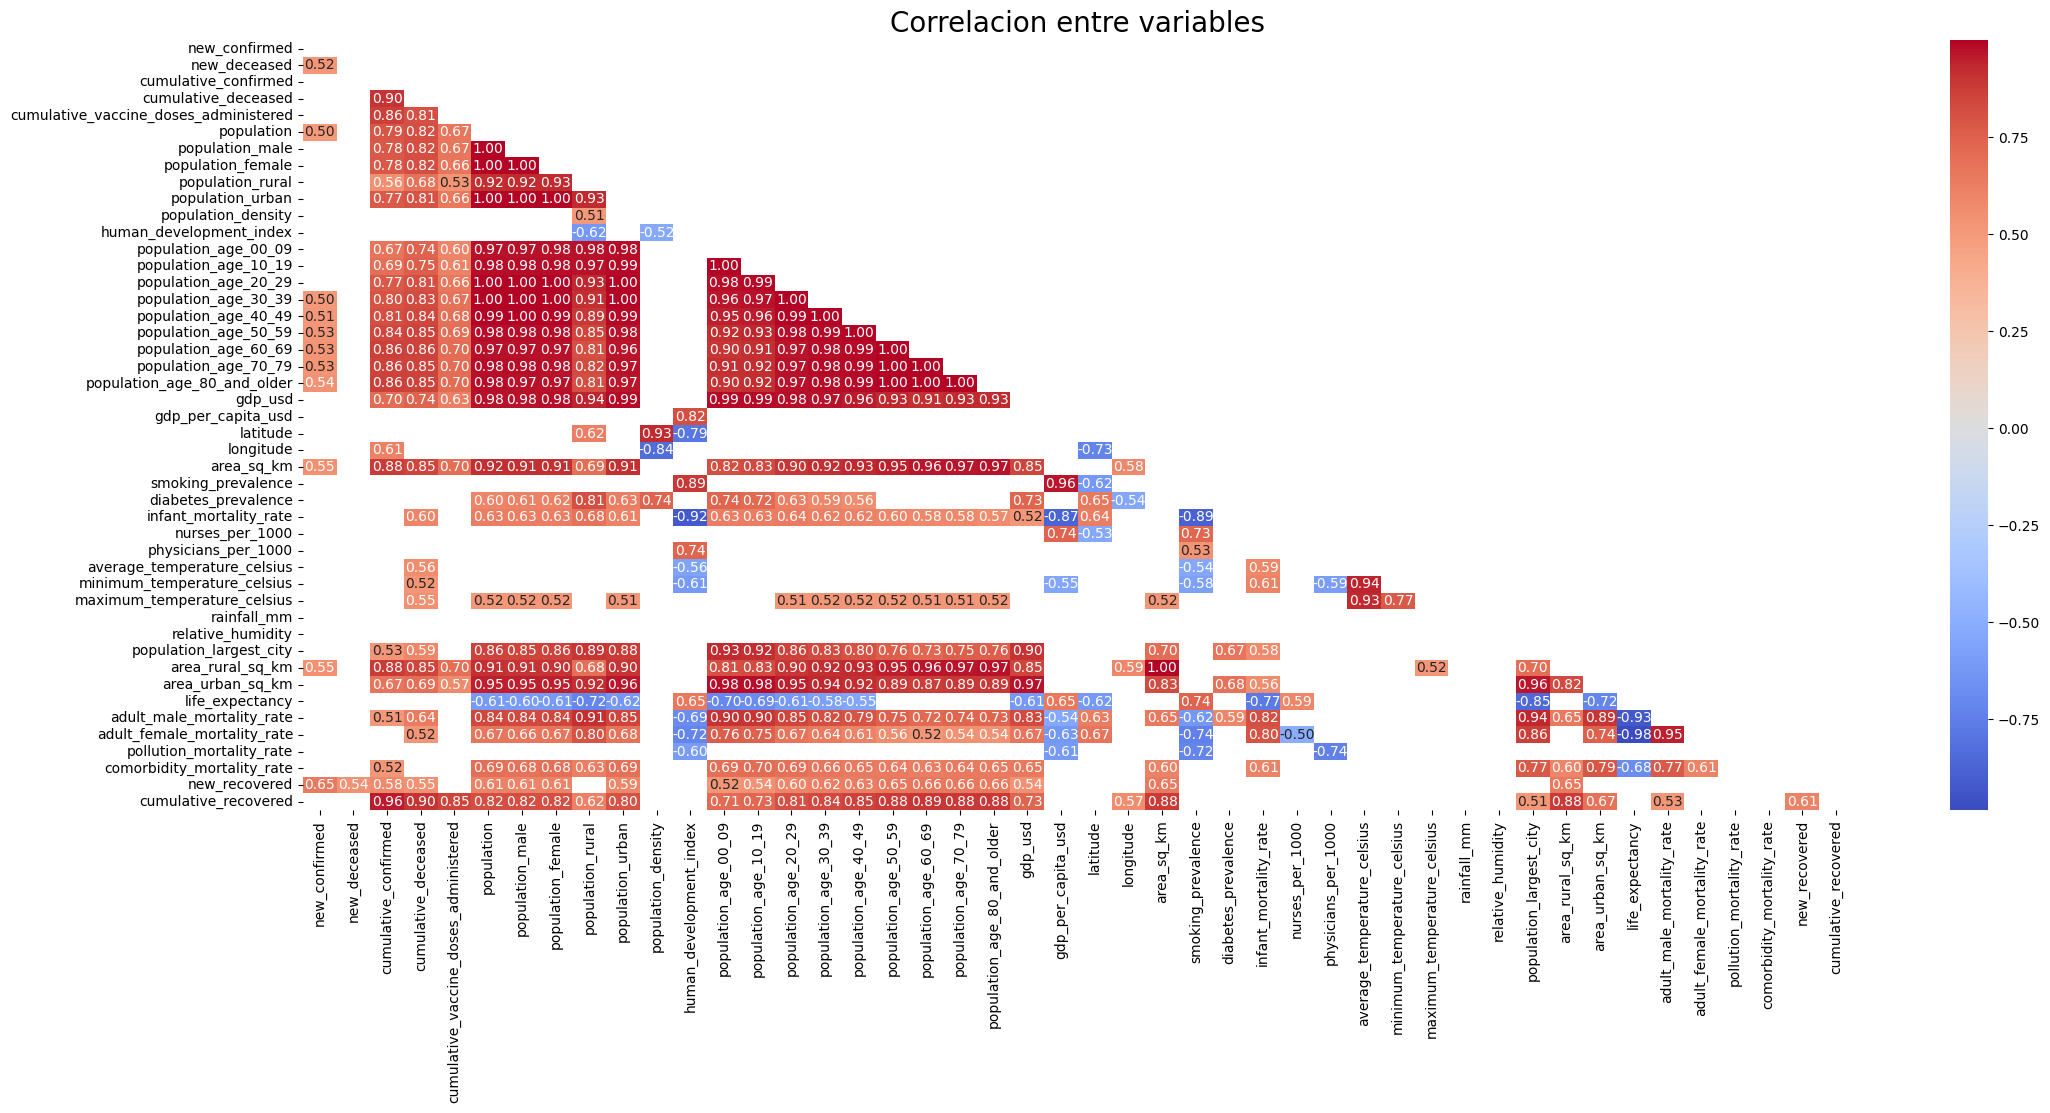

In [125]:
# Creamos un Mapa de calor para identificar correlaciones entre diferentes variables.
columnas_numericas = df_filtrado_paises_fecha.select_dtypes(include=['float64', 'int64']).columns
matriz_correlacion = df_filtrado_paises_fecha[columnas_numericas].corr()

mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool)) #Creacion de mascara para la parte de arriba del triangulo
matriz_correlacion = matriz_correlacion[abs(matriz_correlacion) > abs(0.5)]# En este caso mostramos solo los valores superiores a 0.5, usamos abs para que tome los valores absolutos

#Creacion de grafica 
plt.figure(figsize=(25,10))
heatmap = sns.heatmap(matriz_correlacion, mask=mask, annot=True, cmap='coolwarm', fmt='.2f') #Decimos que queremos ver 2 decimales despues de la coma
plt.title('Correlacion entre variables', fontsize = 20)
plt.show()


### Gráficos de barras de países contra el resto de variables.

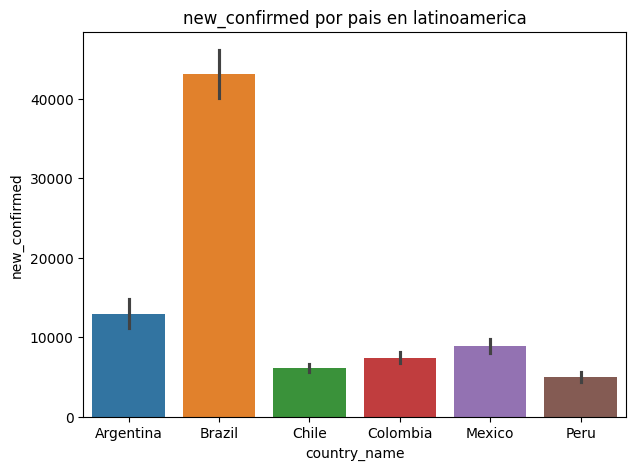

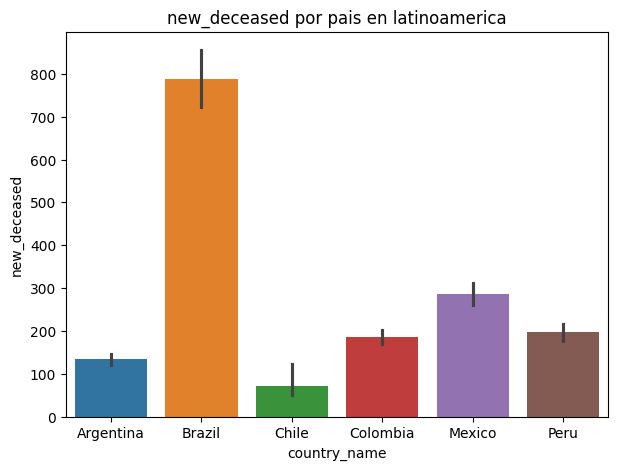

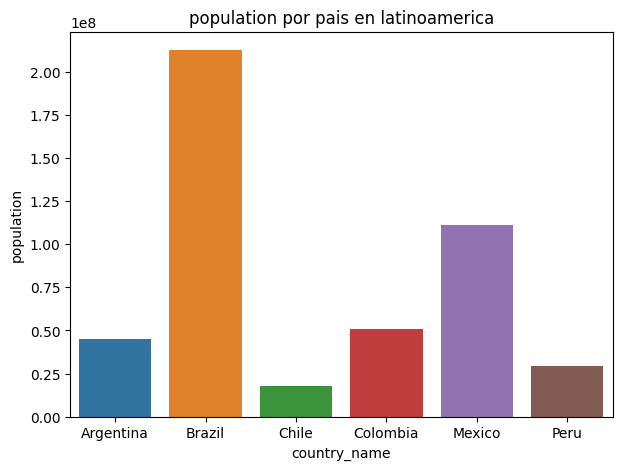

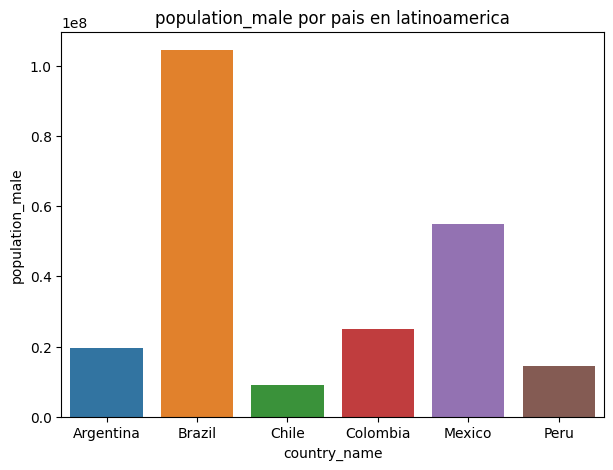

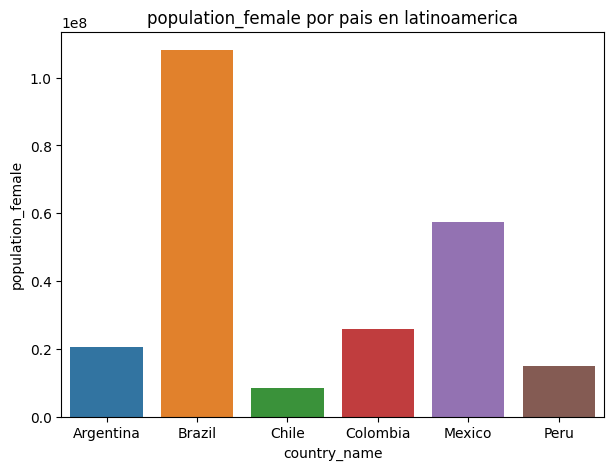

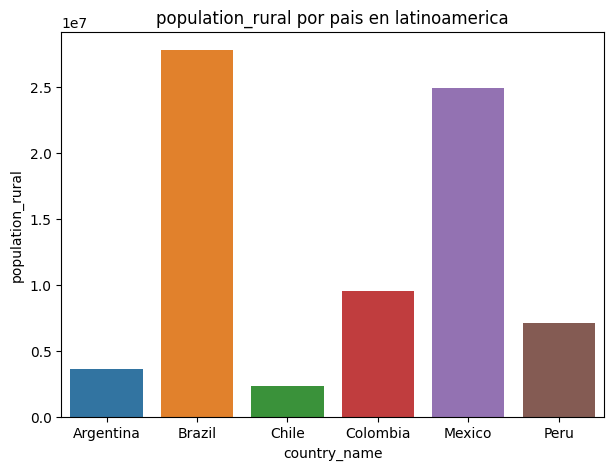

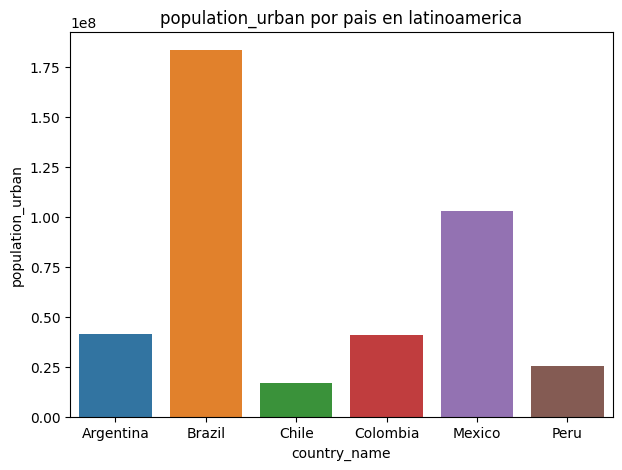

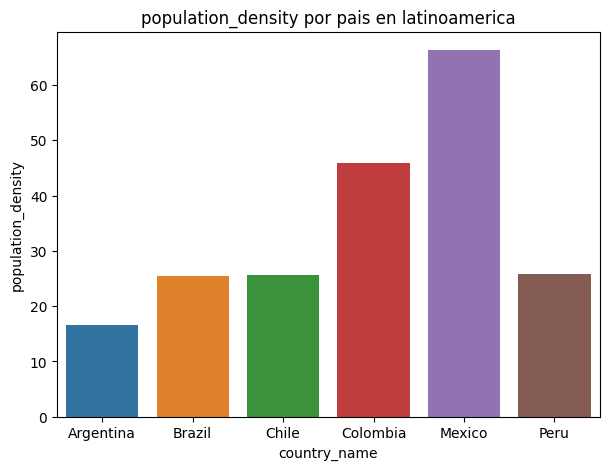

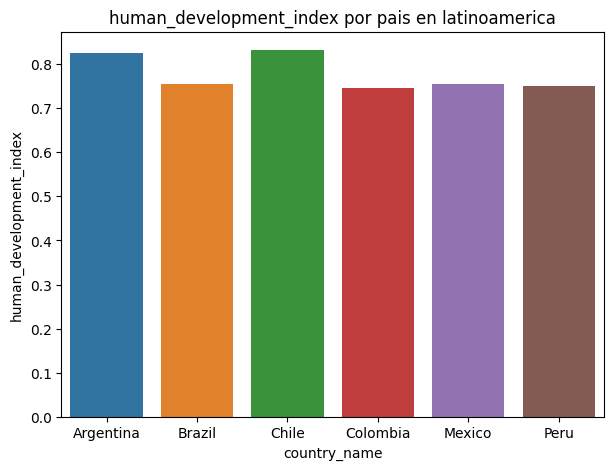

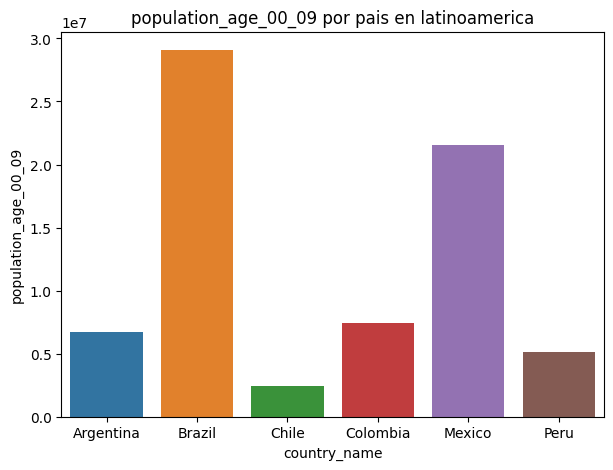

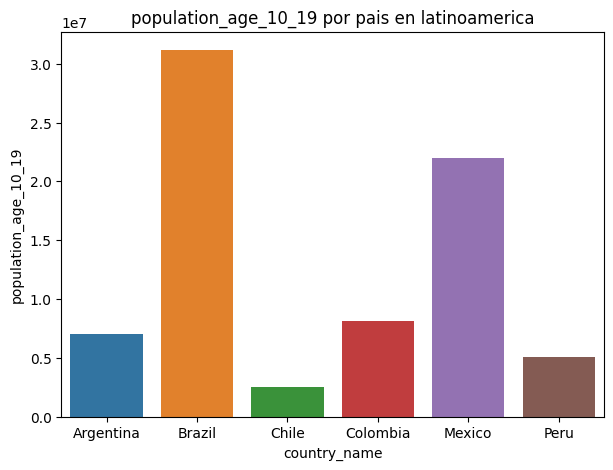

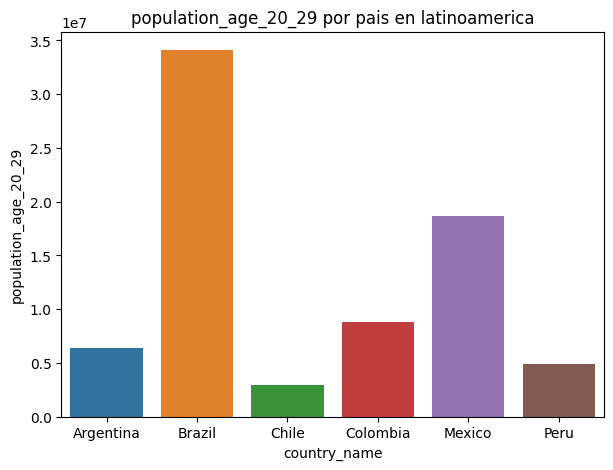

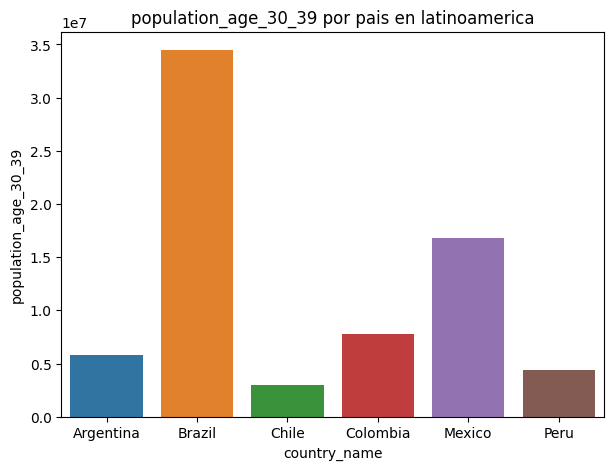

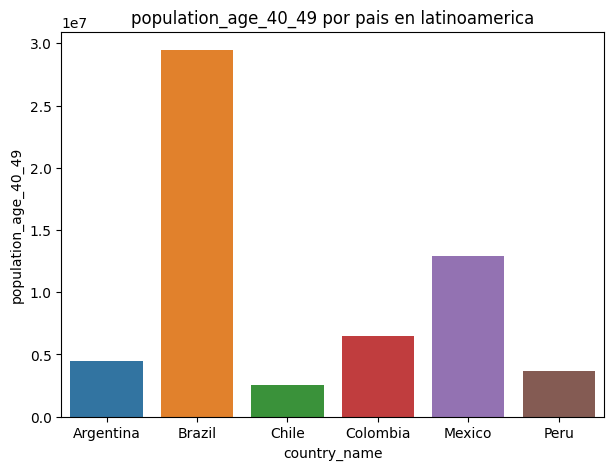

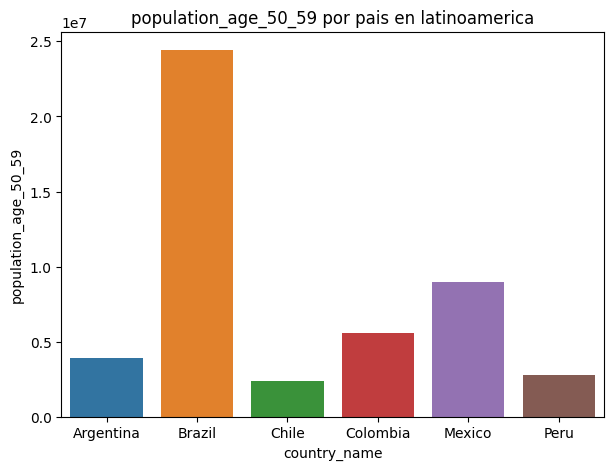

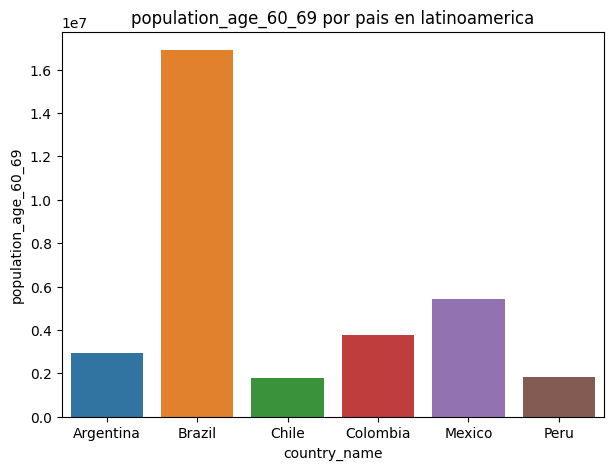

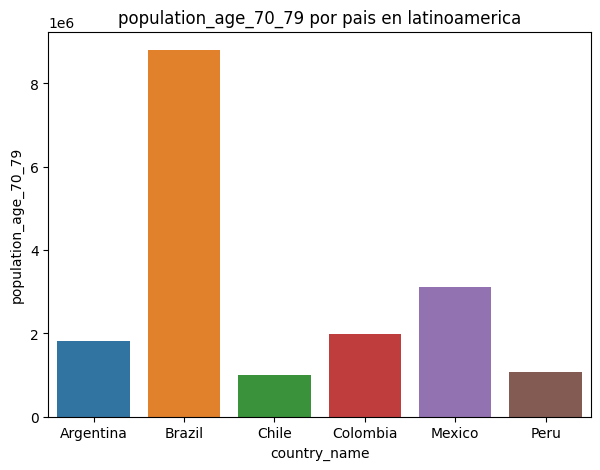

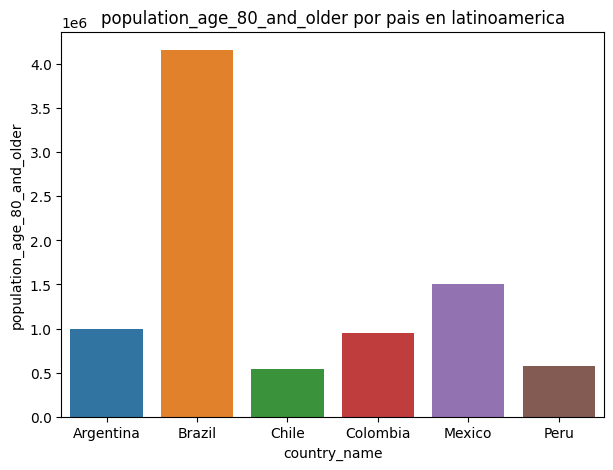

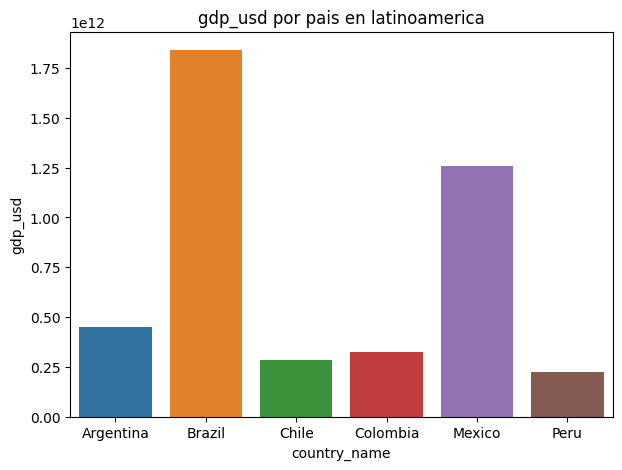

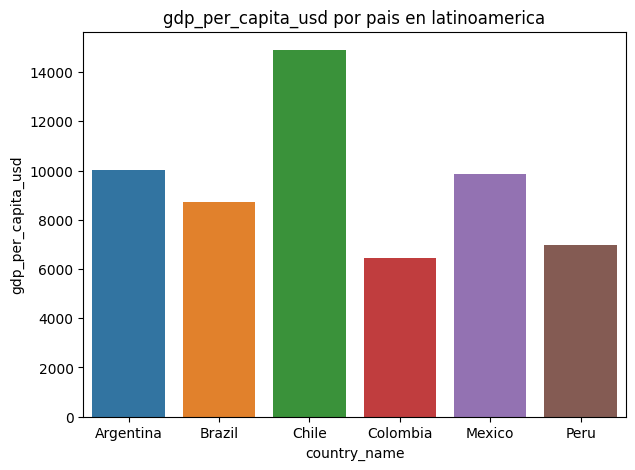

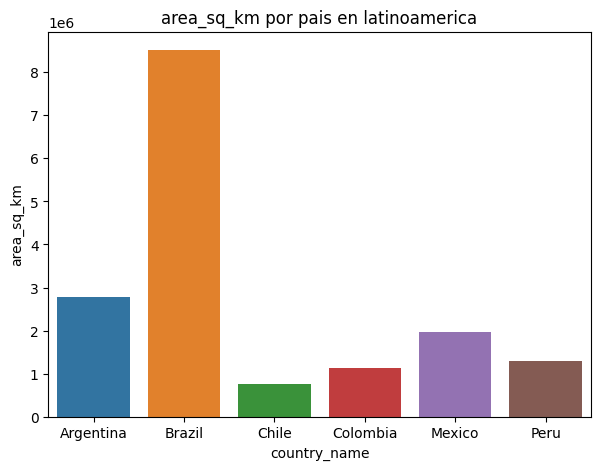

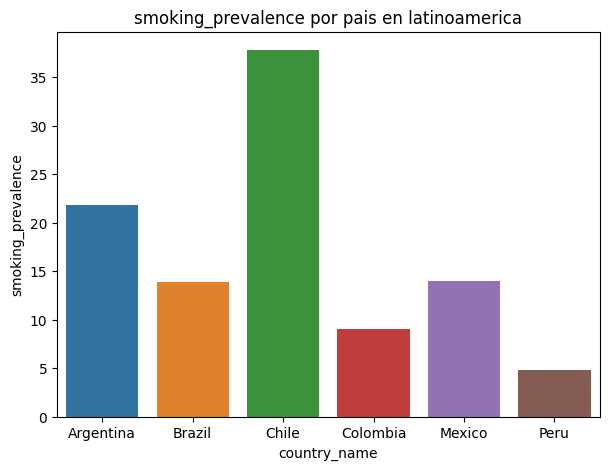

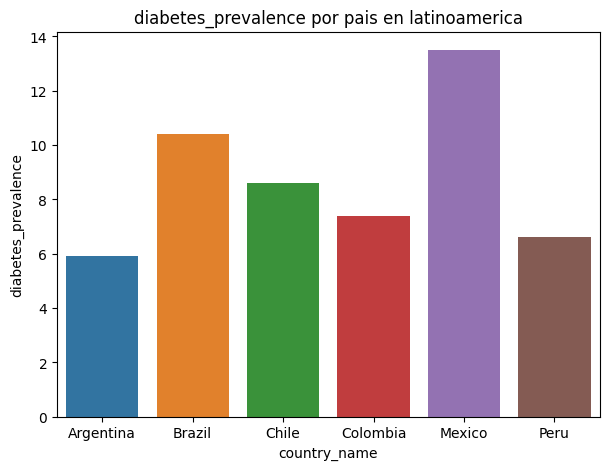

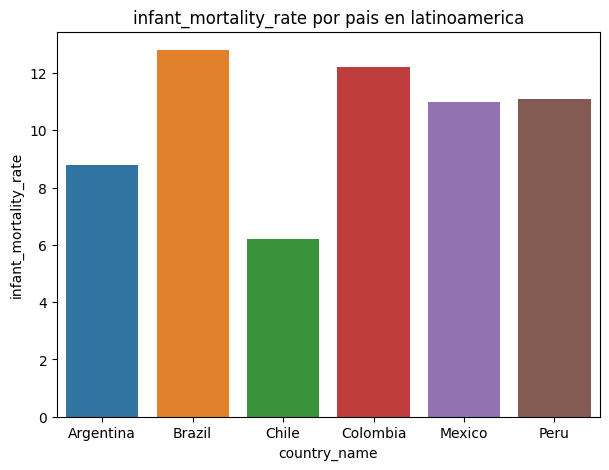

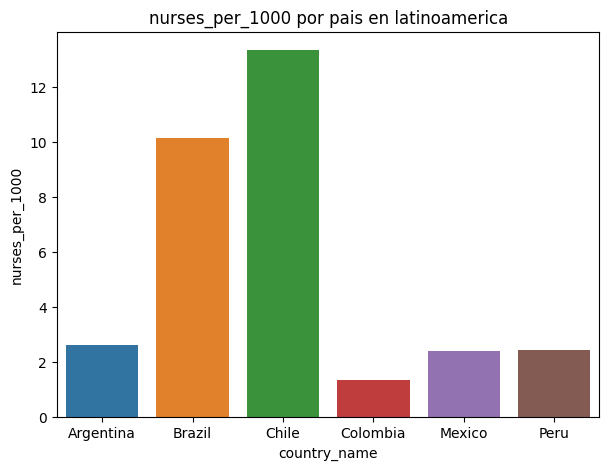

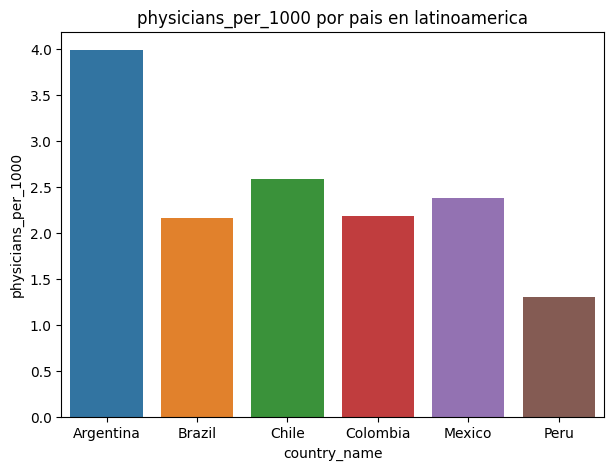

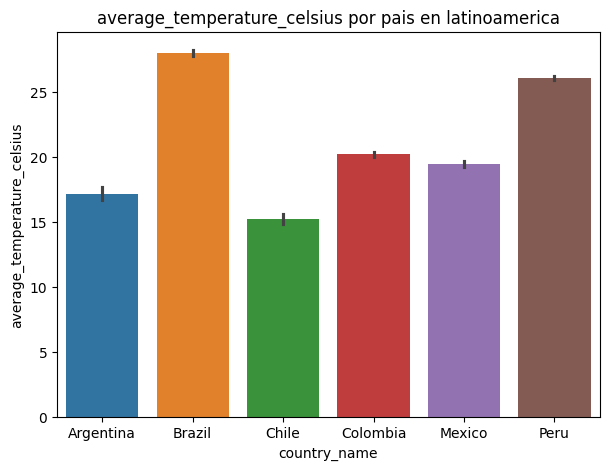

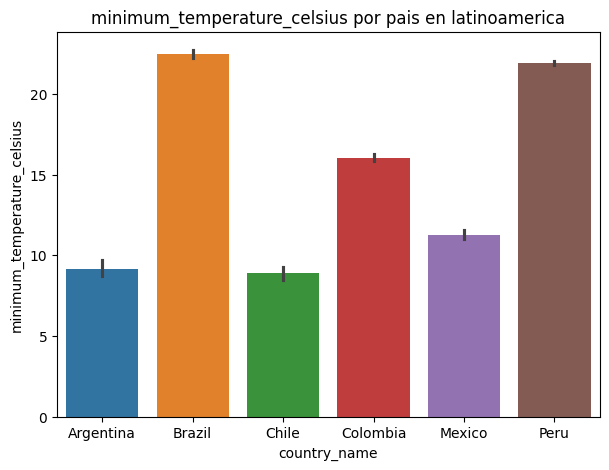

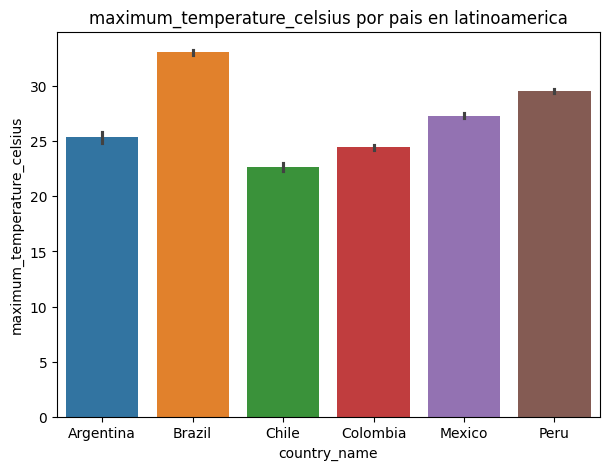

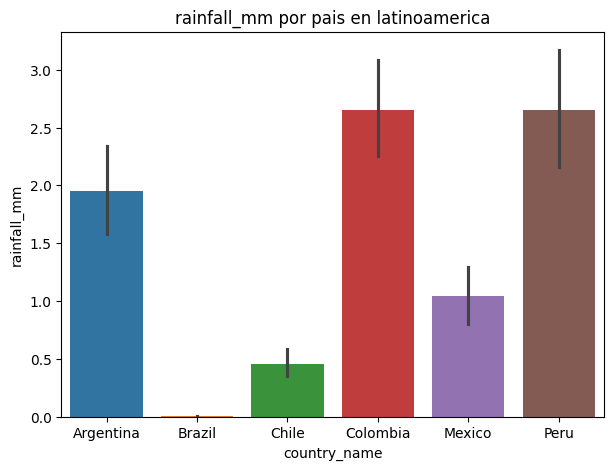

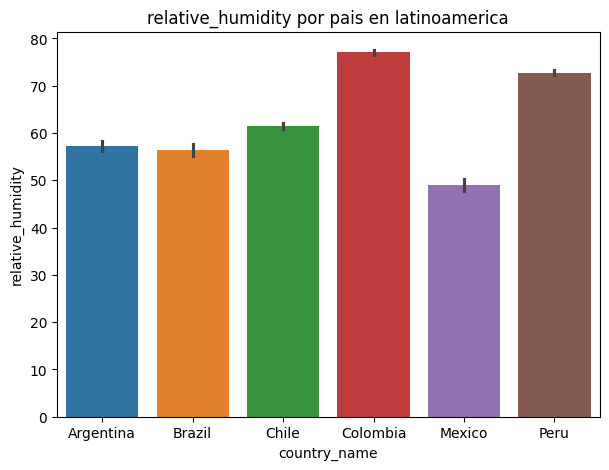

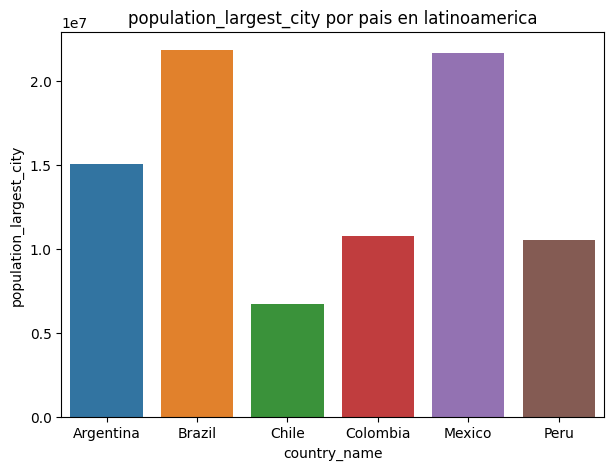

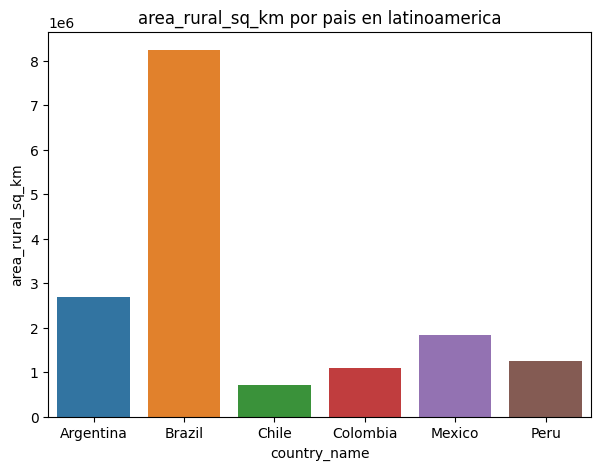

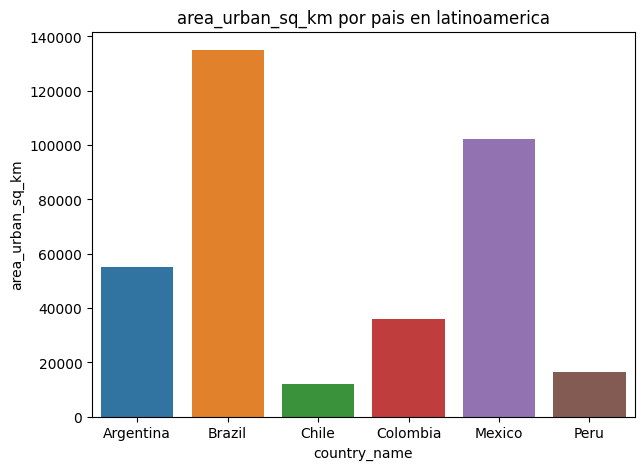

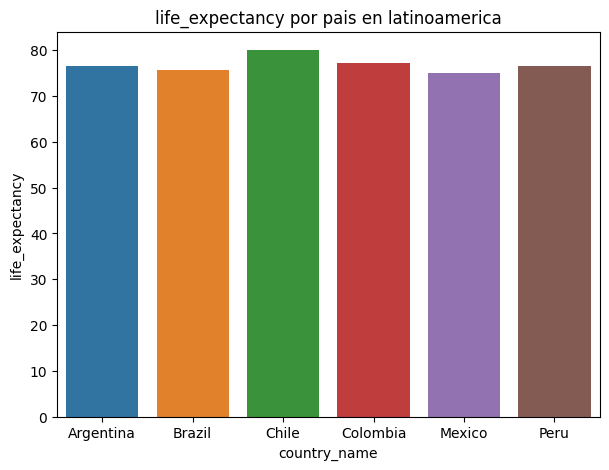

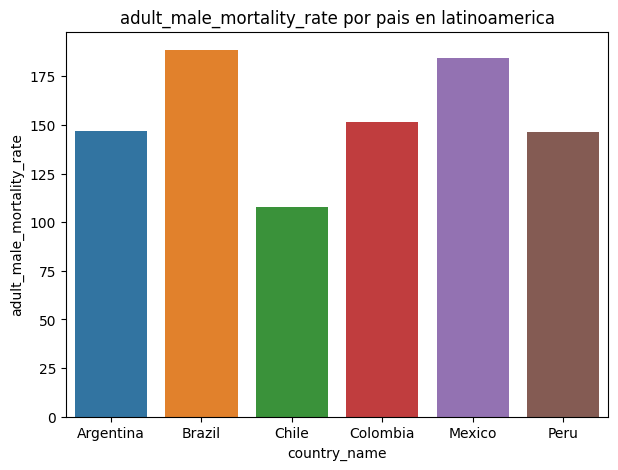

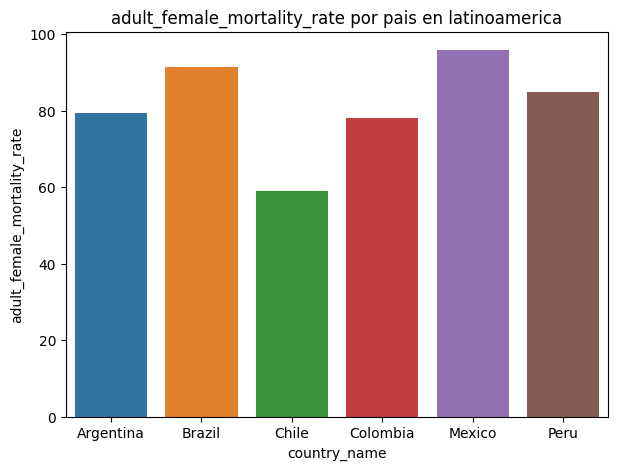

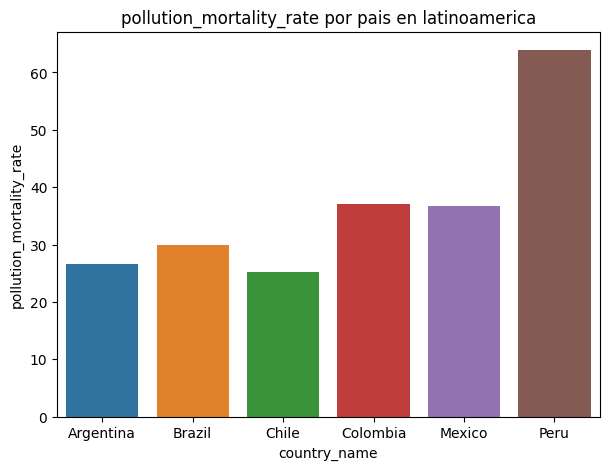

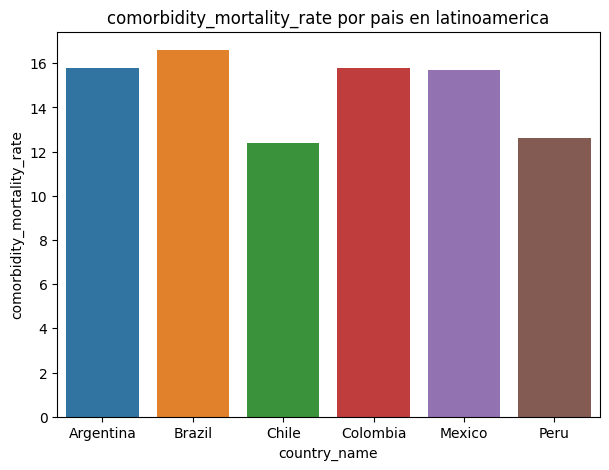

In [126]:
for i in df_filtrado_paises_fecha.columns: #Hacemos que itere columna por columna por nuestro dataframe
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased',
                 'cumulative_recovered', 'cumulative_vaccine_doses_administered', 'new_recovered']: #y si no esta en esta lista, se crea la siguiente figura
        fig, ax = plt.subplots(figsize=(7, 5))
        sns.barplot(x= 'country_name', y=i, data=df_filtrado_paises_fecha, ax=ax, hue='country_name')
        plt.title(f'{i} por pais en latinoamerica')
        plt.show()

### Histogramas de las variables que “Sí” tenga cambios de valores.

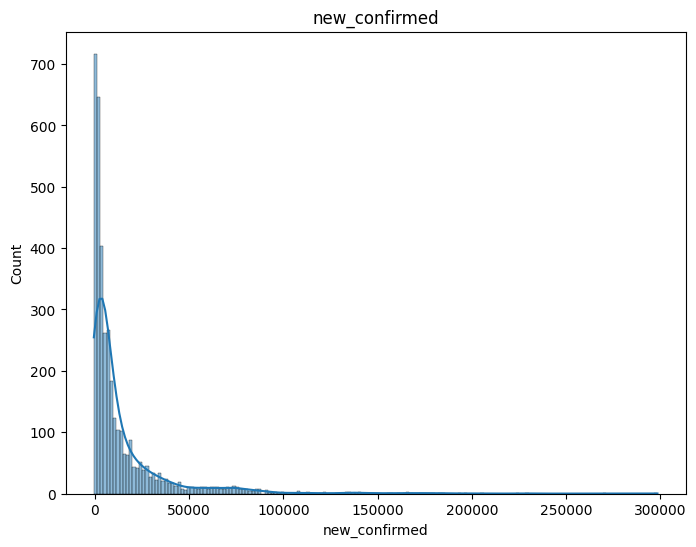

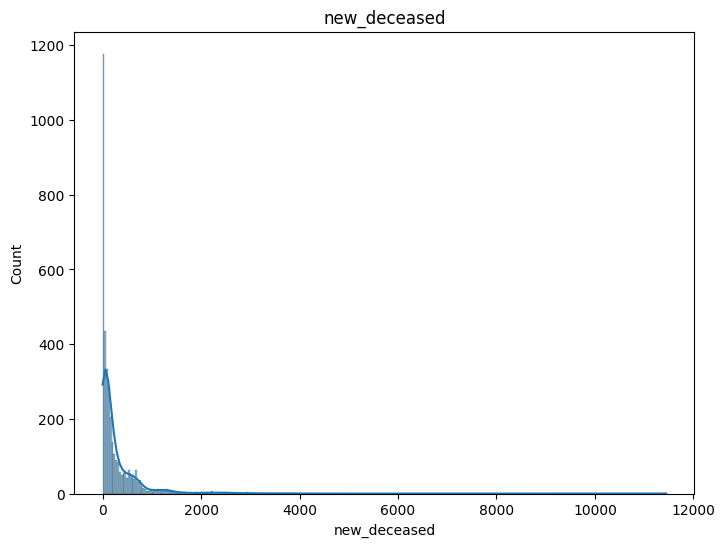

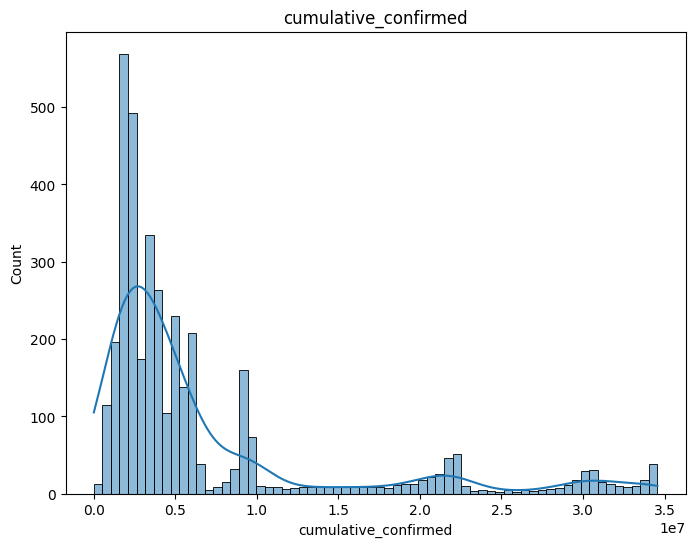

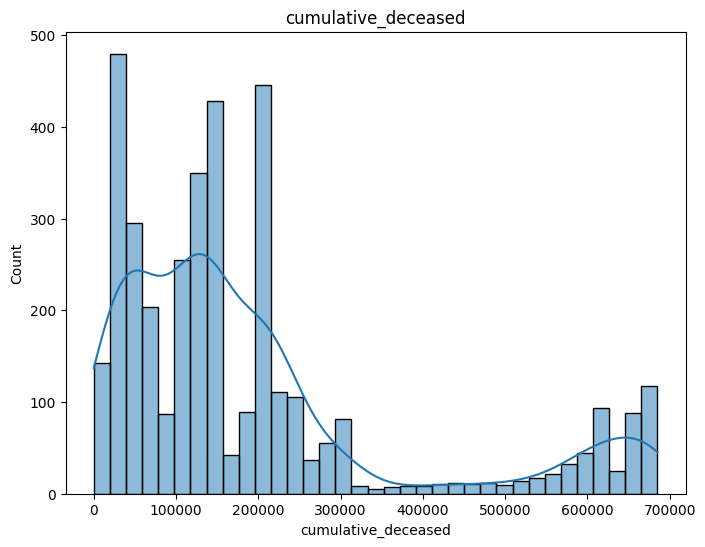

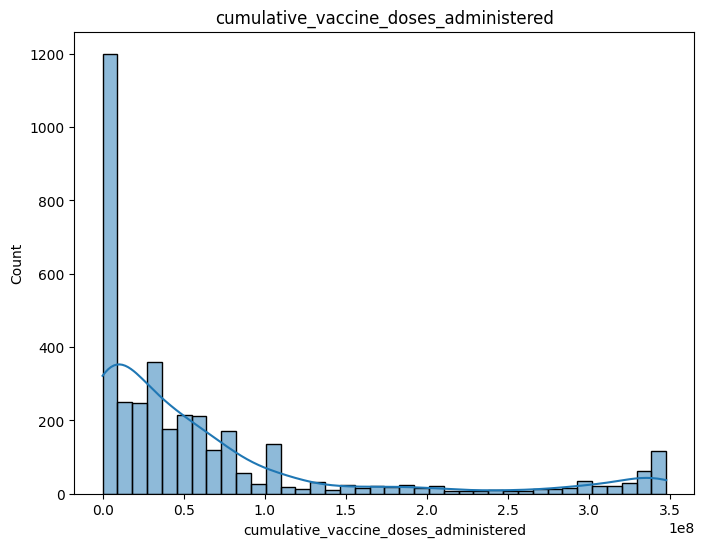

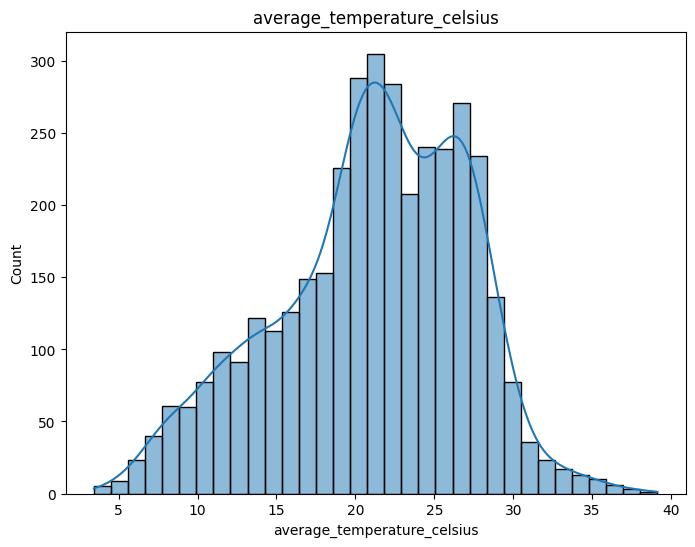

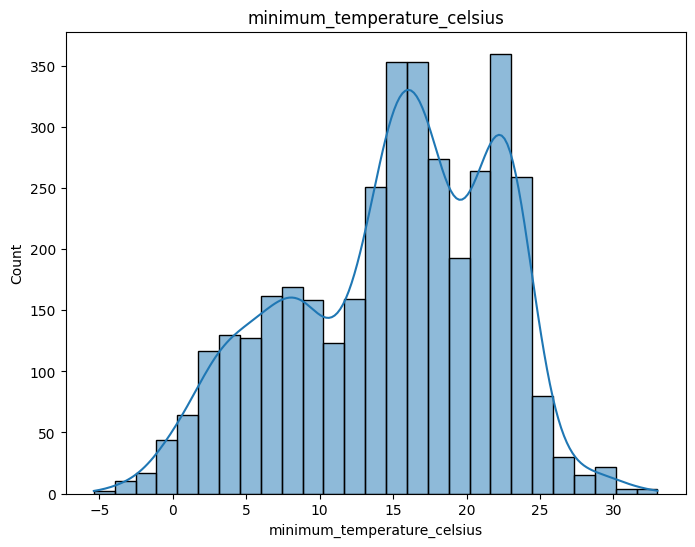

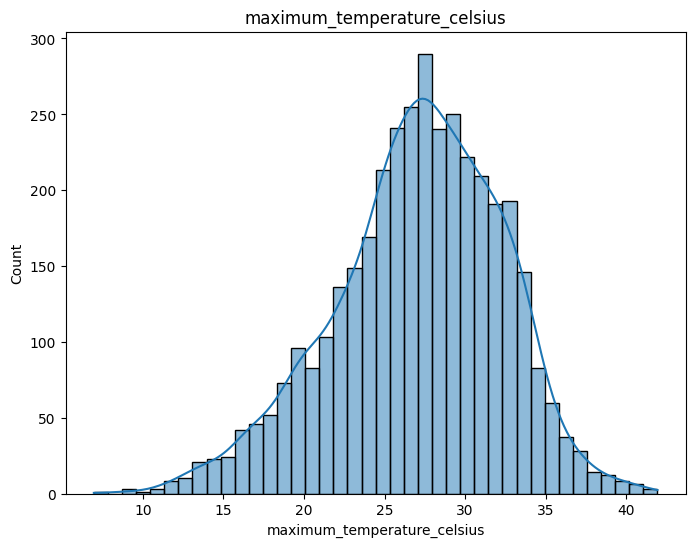

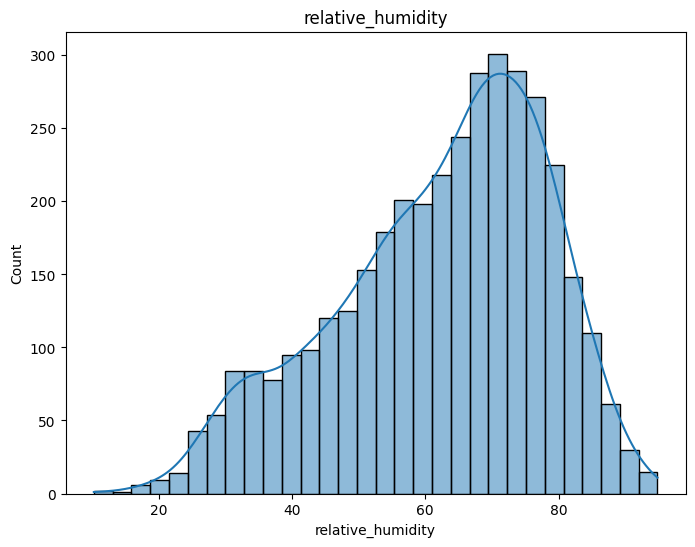

In [127]:
#Esta consigna hay dos manera de hacerlo: una es haciendo una lista de las columnas que vamos a ir iterando y otra es hacer una lista de columnas que no tiene que iterar
#En mi caso voy a hacer una lista que vaya iterando las columnas
columnas_iterar = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
                   'cumulative_vaccine_doses_administered', 'average_temperature_celsius', 'minimum_temperature_celsius',
                   'maximum_temperature_celsius','relative_humidity']
#luego creamos un bucle for para que vaya iterando cada columna de la lista creada
for i in df_filtrado_paises_fecha[columnas_iterar]:
    fig, ax = plt.subplots(figsize = (8, 6))# Creamos una figura de 8 x 6 para luego colocar el grafico
    sns.histplot(data= df_filtrado_paises_fecha[i], kde=True)
    plt.title(i)
    plt.show()


### Diagrama de dispersión de la temperatura media contra los casos confirmados.

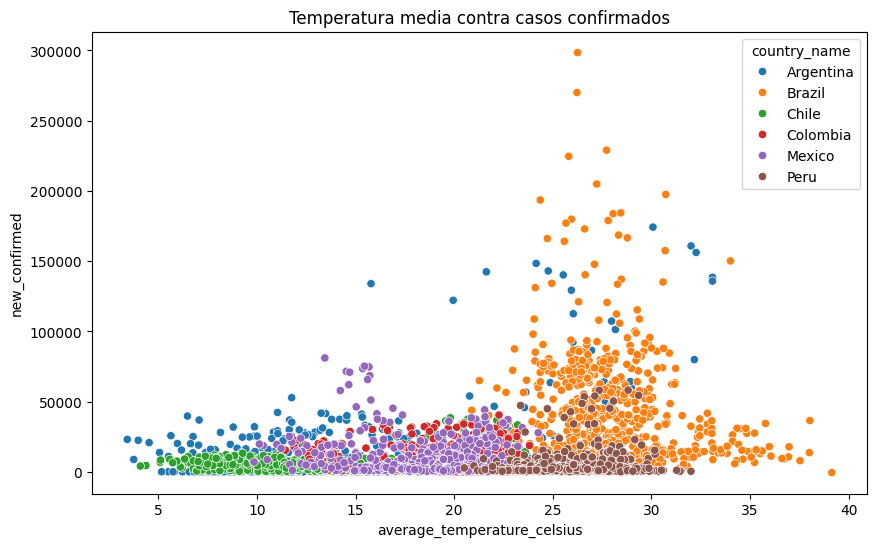

In [128]:
#Hacemos un diagrama de dispersion o scatterplot
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x = 'average_temperature_celsius', y= 'new_confirmed', data= df_filtrado_paises_fecha, hue='country_name')
plt.title('Temperatura media contra casos confirmados')
plt.show()

Aqui vemos que los pacientes de Brasil, presentan una temperatura corporal mayor que otros pacientes de otros paises

### Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

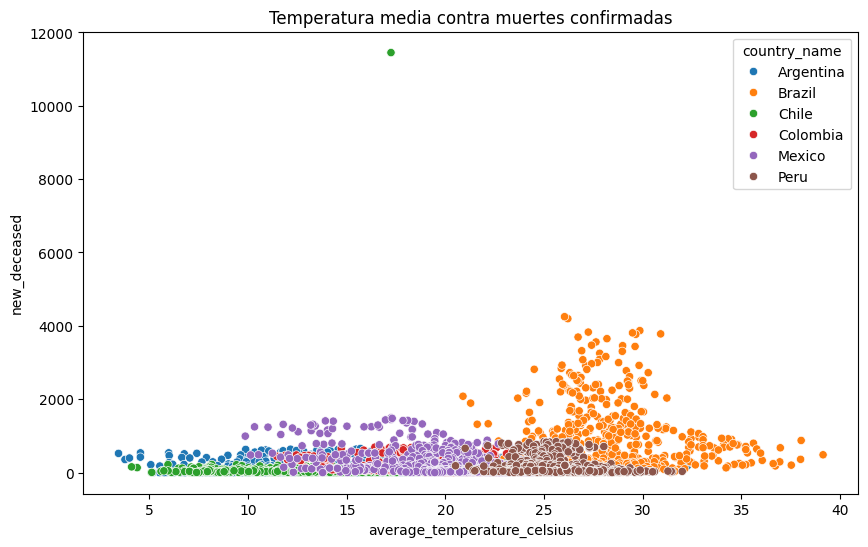

In [129]:
#Es lo mismo que el anterior pero con muertes confirmadas
fig, ax = plt.subplots(figsize= (10, 6))
sns.scatterplot(x= 'average_temperature_celsius', y='new_deceased', data=df_filtrado_paises_fecha, hue='country_name')
plt.title('Temperatura media contra muertes confirmadas')
plt.show()

Aqui podemos ver que los fallecidos por COVID-19 de Brazil, tienen a tener temperaturas corporales mas altas que otros fallecidos de otros paises

### Comportamiento de las dosis administradas de todos los países (Valor medio)

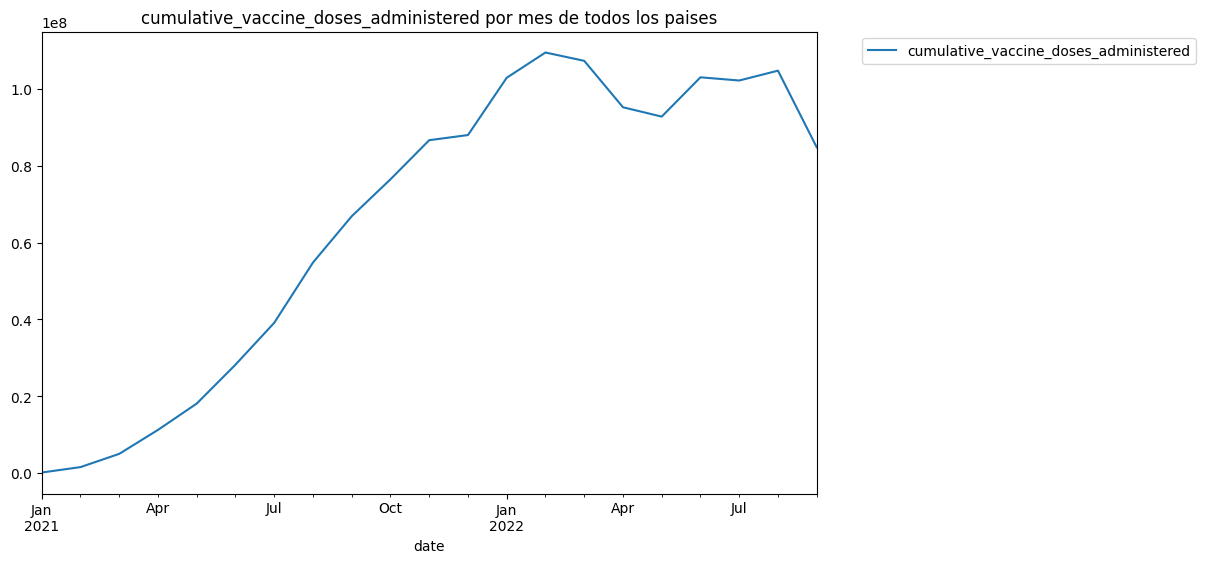

In [130]:
fig, ax = plt.subplots(figsize= (10, 6))
df_filtrado_paises_fecha.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
#Usamos resample y no groupby por que es una grafica de tiempo y la agrupamos por mes

plt.legend(bbox_to_anchor= (1.05, 1), loc= 'upper left')
plt.title('cumulative_vaccine_doses_administered por mes de todos los paises')
plt.show()

Podemos observar como fue aumentando gradualmente las dosis administradas a las poblaciones. Ya para el principio de todo 2022, tenemos un buen nivel de dosis administradas

### Evolución de dosis administradas por mes de cada país.

In [131]:
df_filtrado_paises_fecha['cumulative_vaccine_doses_administered'].isnull()

date
2021-01-02    False
2021-01-03    False
2021-01-04    False
2021-01-05    False
2021-01-06    False
              ...  
2022-09-13    False
2022-09-14    False
2022-09-15    False
2022-09-16    False
2022-09-17    False
Name: cumulative_vaccine_doses_administered, Length: 3744, dtype: bool

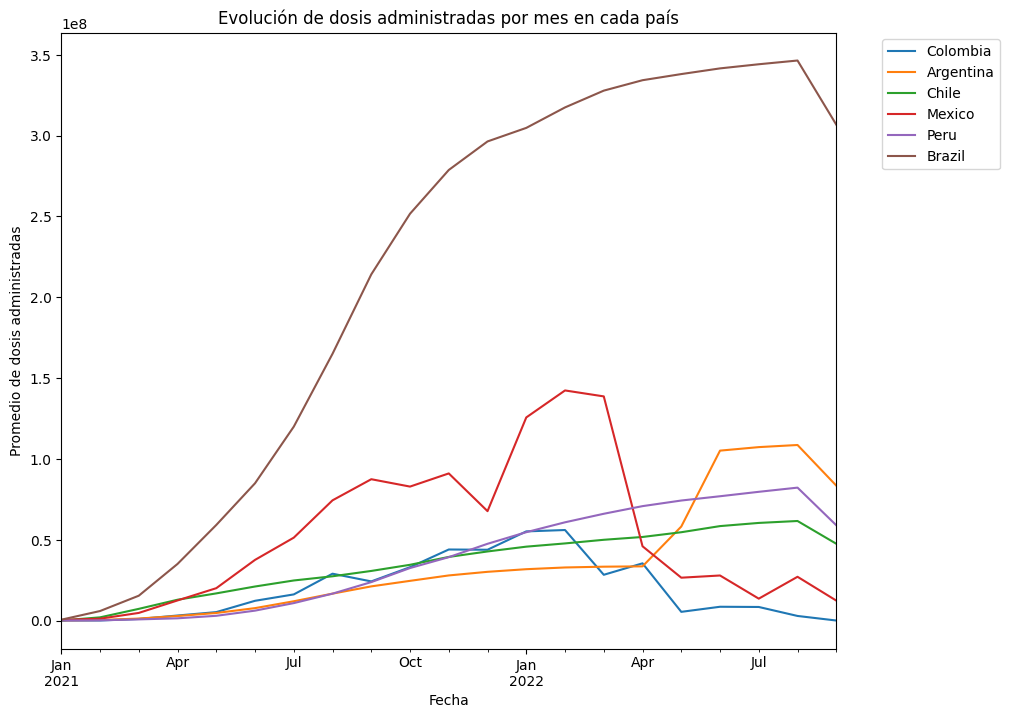

In [136]:
fig, ax = plt.subplots(figsize=(10,8))

paises_expansion = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']

for pais in paises_expansion:
    datos_paises = df_filtrado_paises_fecha[df_filtrado_paises_fecha['country_name']== pais]
    datos_paises.resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot(ax=ax, label=pais)

plt.title("Evolución de dosis administradas por mes en cada país")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.xlabel("Fecha")
plt.ylabel("Promedio de dosis administradas")
plt.show()

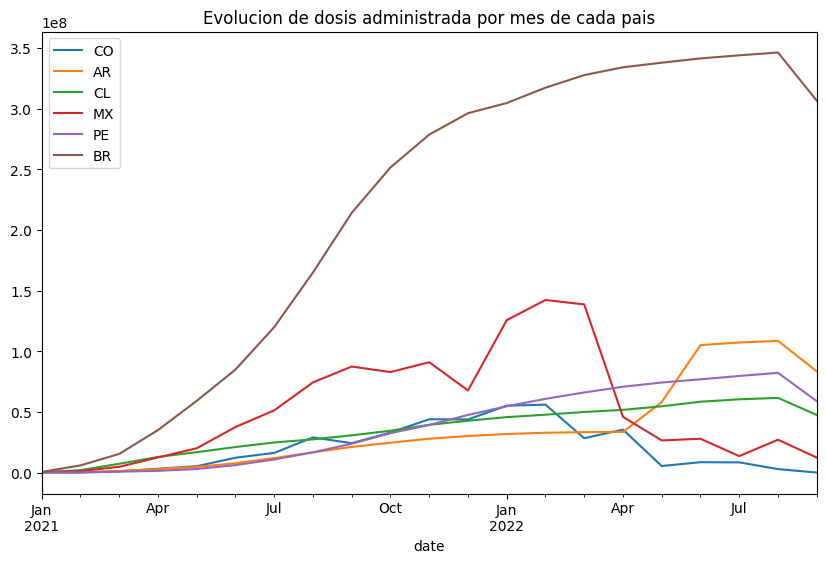

In [137]:
fig, ax = plt.subplots(figsize=(10, 6))#Creacion de figura en blanco
for pais in paises_filtrados:
    df_filtrado_paises_fecha[df_filtrado_paises_fecha['location_key']== pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot(
        ax=ax, label=pais
    )

plt.title('Evolucion de dosis administrada por mes de cada pais')
plt.legend(bbox_to_anchor = (1.05, 1), loc= 'upper left')
plt.legend(paises_filtrados)
plt.show()

Este grafico es similar al grafico anterior, nada mas que aqui podemos ver mas detalladamente por pais las dosis administradas

### Muertes por mes de cada país.

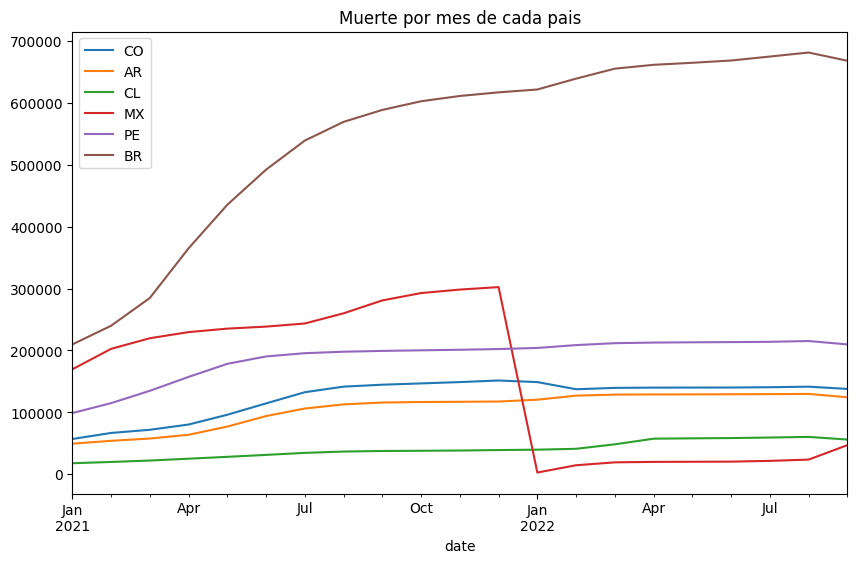

In [140]:
fig, ax = plt.subplots(figsize= (10,6))
for pais in paises_filtrados:
    df_filtrado_paises_fecha[df_filtrado_paises_fecha['location_key']== pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot(
        ax=ax, label=pais
    )

plt.title('Muerte por mes de cada pais')
plt.legend(bbox_to_anchor = (1.05, 1), loc= 'upper left')
plt.legend(paises_filtrados)
plt.show()

Aqui vemos que el pais que mas muerte ha tenido ha sido Brasil, luego Mexico, Peru, Colombia, Argentina y por ultimo Chile. Aun asi esto no significa que Brasil por ejemplo haya sido el
 menos cuidado tuvo en la pandemia, ya que si hacemos un conteo de la cantidad de habitantes por pais, Brasil tiene muchos mas que Chile, entonces siempre va a haber mayor indice de mortalidad

### Casos confirmados por mes de pais

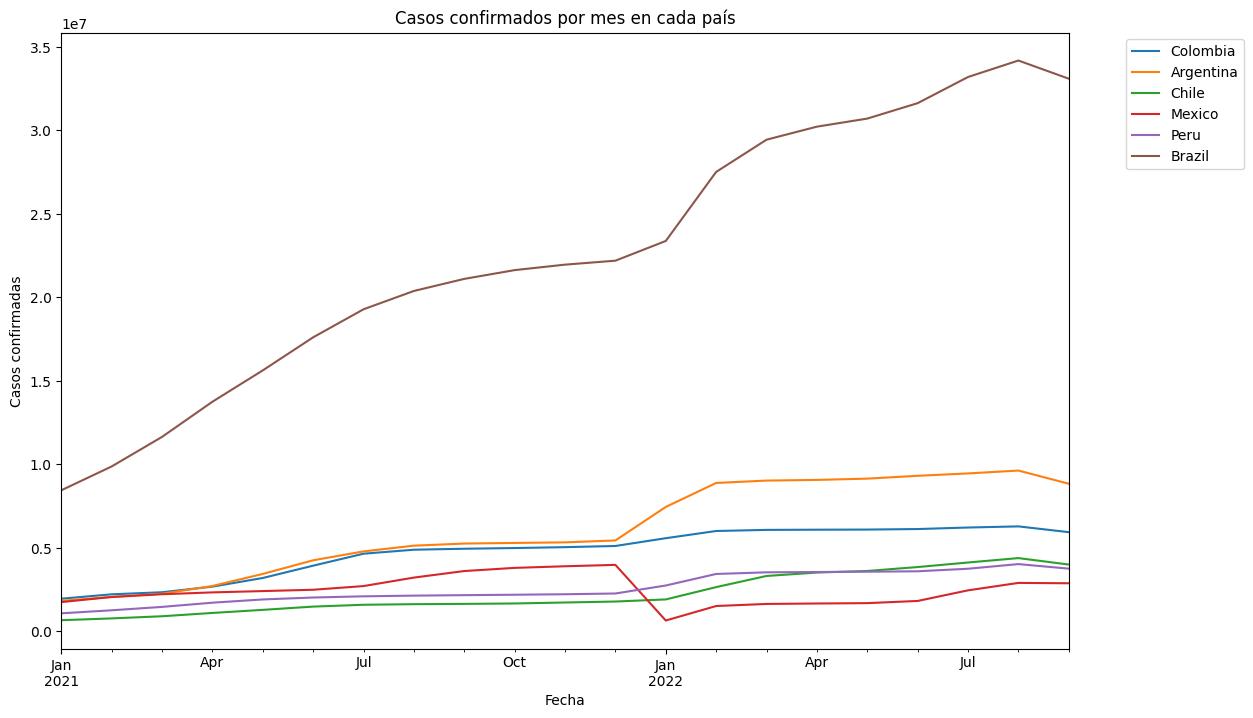

In [141]:
fig, ax = plt.subplots(figsize=(13,8))

paises_expansion = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']

for pais in paises_expansion:
    datos_paises = df_filtrado_paises_fecha[df_filtrado_paises_fecha['country_name']== pais]
    datos_paises.resample("ME").mean(numeric_only=True)["cumulative_confirmed"].plot(ax=ax, label=pais)

plt.title("Casos confirmados por mes en cada país")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.xlabel("Fecha")
plt.ylabel("Casos confirmadas")
plt.show()



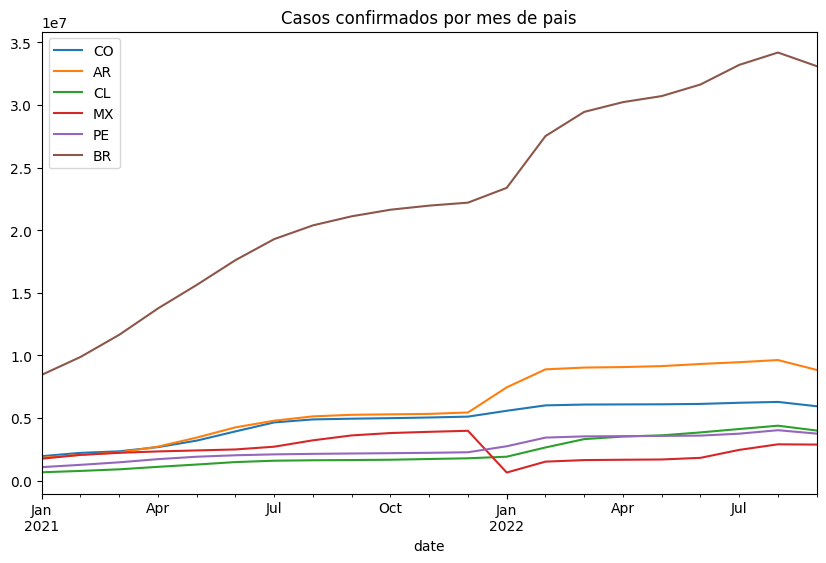

In [142]:
fig, ax = plt.subplots(figsize= (10,6))

for pais in paises_filtrados:
    df_filtrado_paises_fecha[df_filtrado_paises_fecha['location_key']== pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot(
        ax=ax, label=pais
    )

plt.title('Casos confirmados por mes de pais')
plt.legend(bbox_to_anchor = (1.05, 1), loc= 'upper left')
plt.legend(paises_filtrados)
plt.show()

Nuevamente vemos que Brasil esta primero en casos confirmados, pero aun asi no quiere decir que manejo mal la pandemia, sino es por un tema de cantidad de habitantes

### Recuperaciones de casos por mes de cada país.

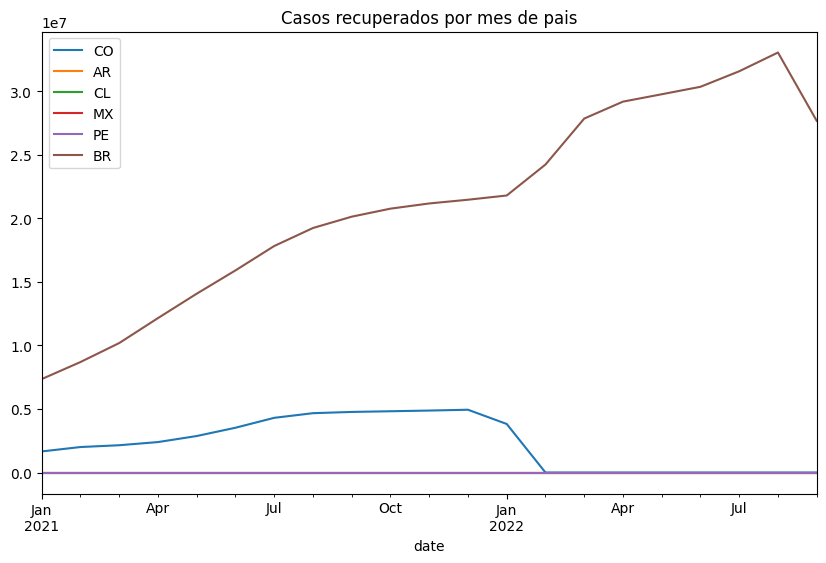

In [143]:
fig, ax = plt.subplots(figsize= (10,6))
for pais in paises_filtrados:
    df_filtrado_paises_fecha[df_filtrado_paises_fecha['location_key']== pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot(
        ax=ax, label=pais
    )

plt.title('Casos recuperados por mes de pais')
plt.legend(bbox_to_anchor = (1.05, 1), loc= 'upper left')
plt.legend(paises_filtrados)
plt.show()

Aqui solo vemos datos de Brasil y de Colombia, por que son los unicos que tienen datos.

### Comparación del Número de Casos Nuevos entre Países.

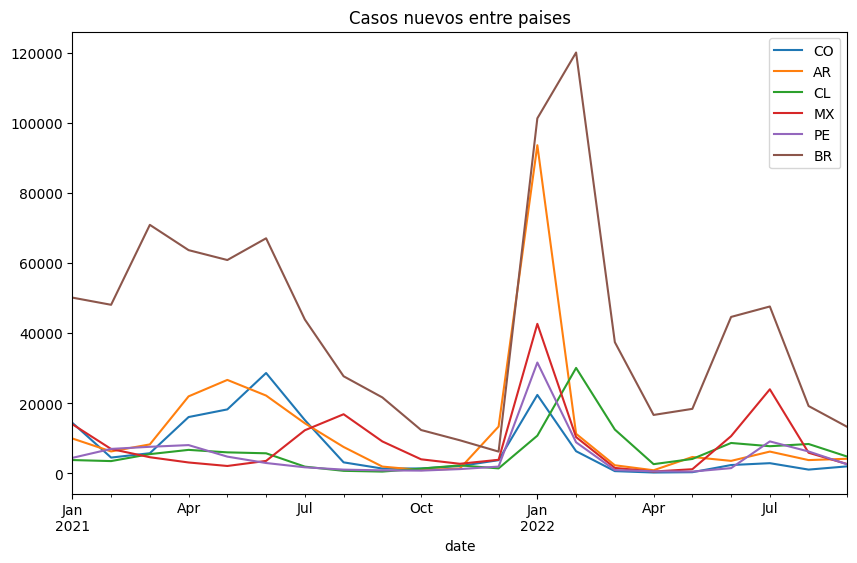

In [144]:
fig, ax = plt.subplots(figsize= (10,6))
for pais in paises_filtrados:
    df_filtrado_paises_fecha[df_filtrado_paises_fecha['location_key']== pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot(
        ax=ax, label=pais
    )

plt.title('Casos nuevos entre paises')
plt.legend(bbox_to_anchor = (1.05, 1), loc= 'upper left')
plt.legend(paises_filtrados)
plt.show()

Vemos que un poco antes de Enero de 2022 en los datos de Argentina y Brasil aumenta drasticamente los nuevos casos, pero esto se debe a que hacian la sumatoria de varios dias en uno solo. Entonces la grafica hace esos saltos espontaneos

### Dosis acumuladas por país

Text(0.5, 1.0, 'Distribucion de dosis por pais')

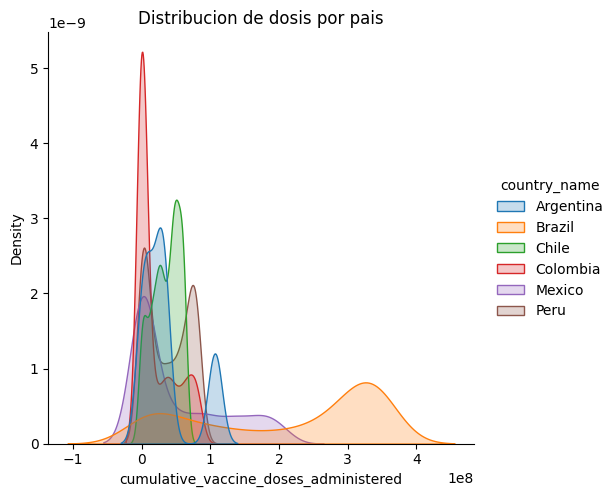

In [145]:

#Para este caso vamos a hacer un displot()
sns.displot(df_filtrado_paises_fecha, x='cumulative_vaccine_doses_administered', hue='country_name', kind='kde', fill=True)
plt.title('Distribucion de dosis por pais')
#No usamos plt.show() por que sns.displot() ya crea una figura y la muestra automaticamente


Si vemos, vamos a notar que Colombia al principio tuvo una cantidad grande de dosis acumuladas, sin embargo despues disminuyo. En cambio Brasil, vemos que siempre tuvo una cantidad de dosis acumuladas, eso quiere decir que no estaban bien distribuidas. Tal vez por la cantidad de habitantes que viven en Brasil

### Boxplot de temperatura media de cada país.

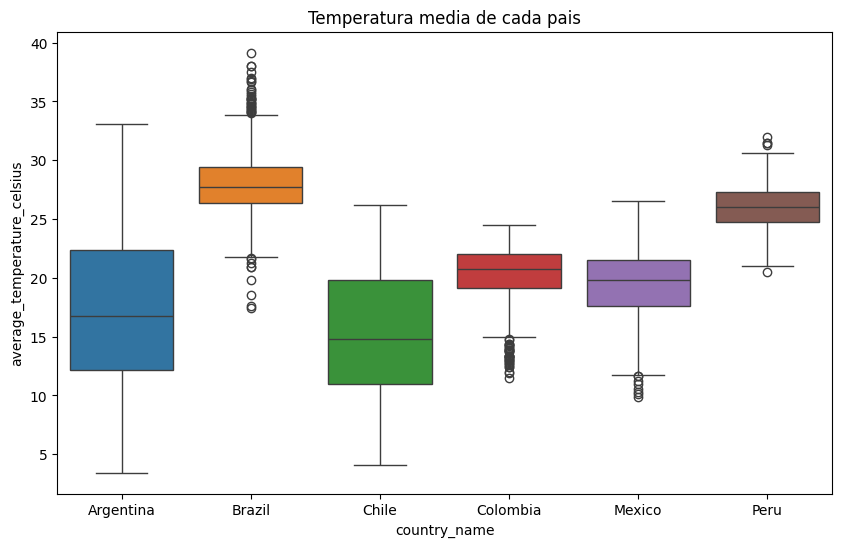

In [146]:
fig, ax = plt.subplots(figsize=(10,6))# como siempre primero creamos una figura en blanco y despues agregamos el grafico
sns.boxplot(x='country_name', y='average_temperature_celsius', data=df_filtrado_paises_fecha, hue='country_name')
plt.title('Temperatura media de cada pais')
plt.show()

Aqui podemos ver que Brasil tiene varios valores atipicos , pero aun asi el rango es mas chico que el de Argentina que no tiene valores atipicos
Otra cosa tambien es que Colombia tiene el Cuartil 75 mas por encima que los demas.

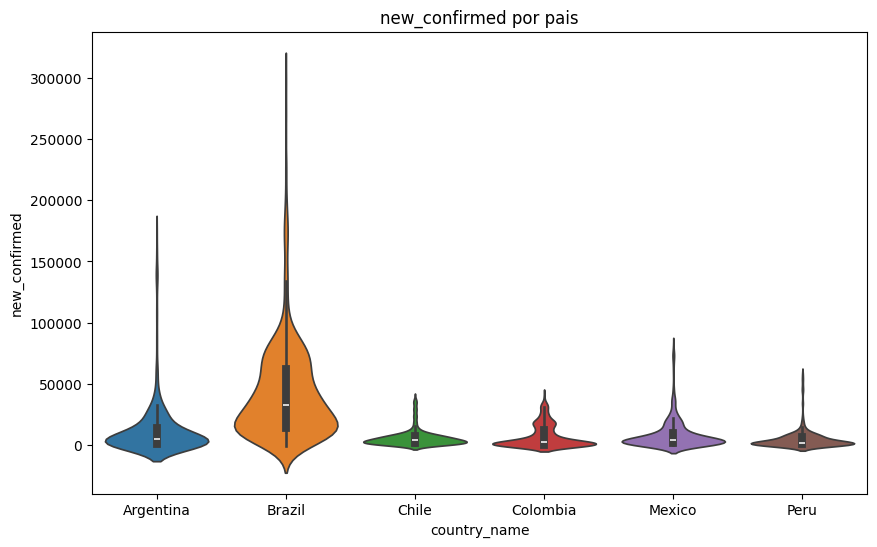

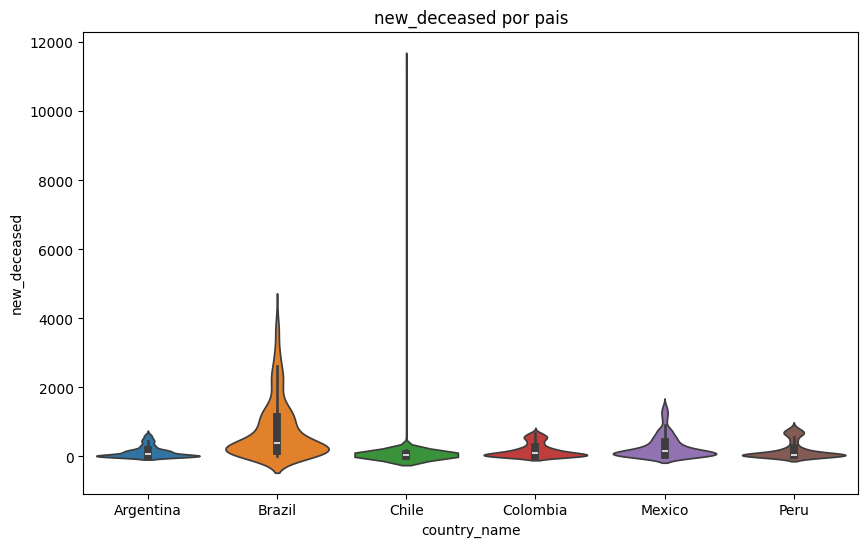

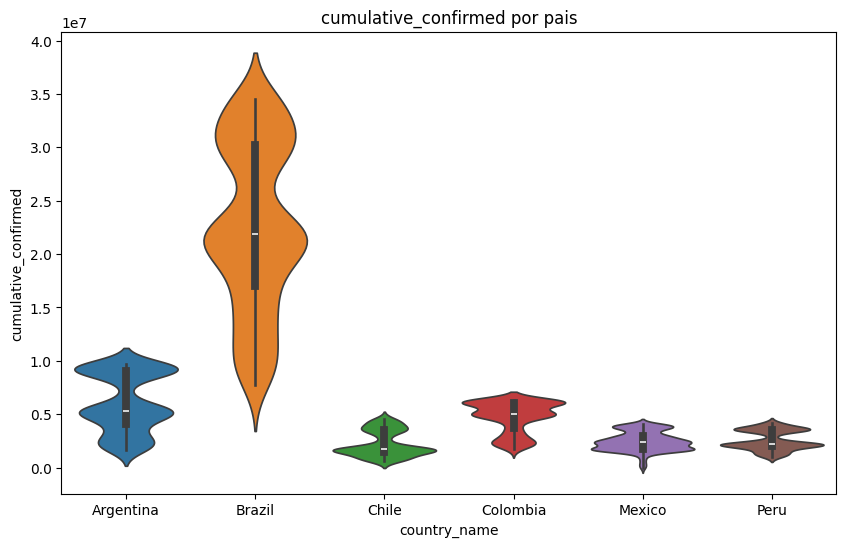

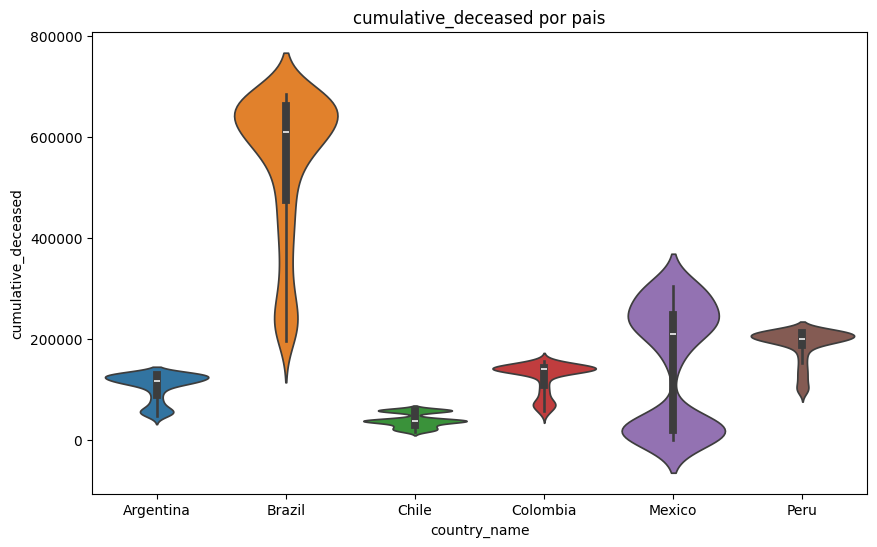

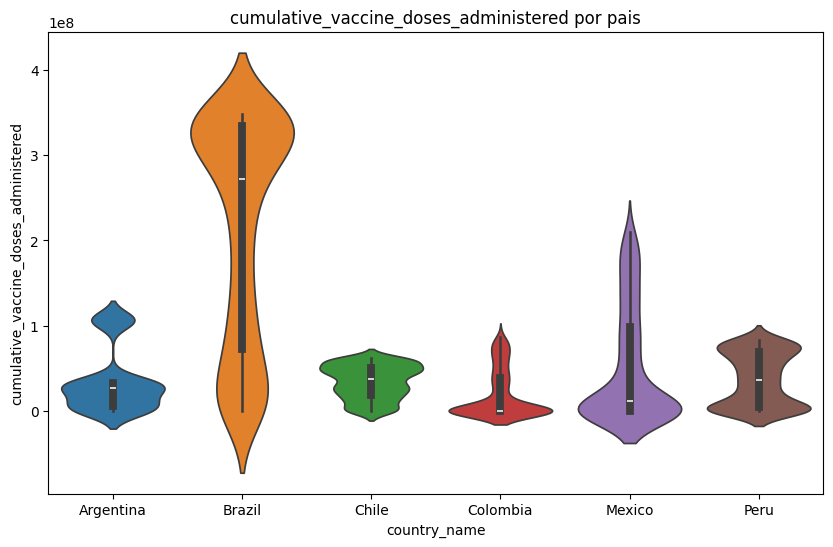

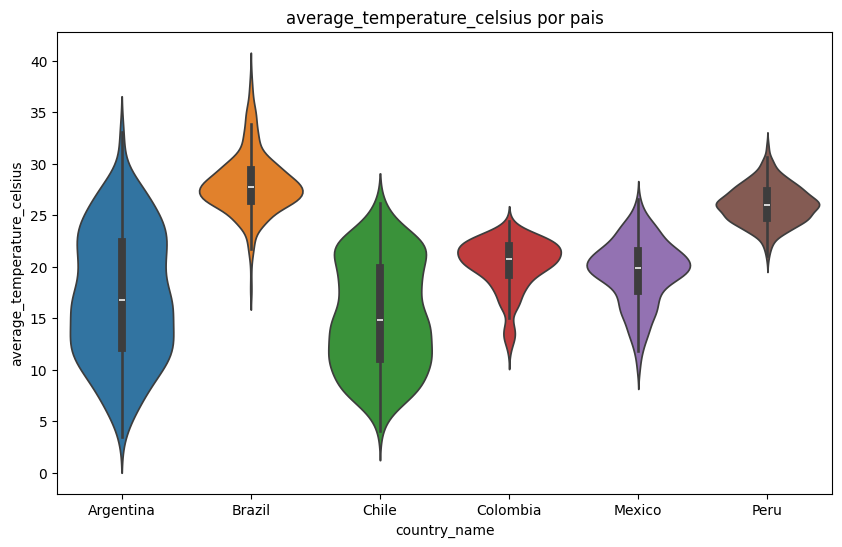

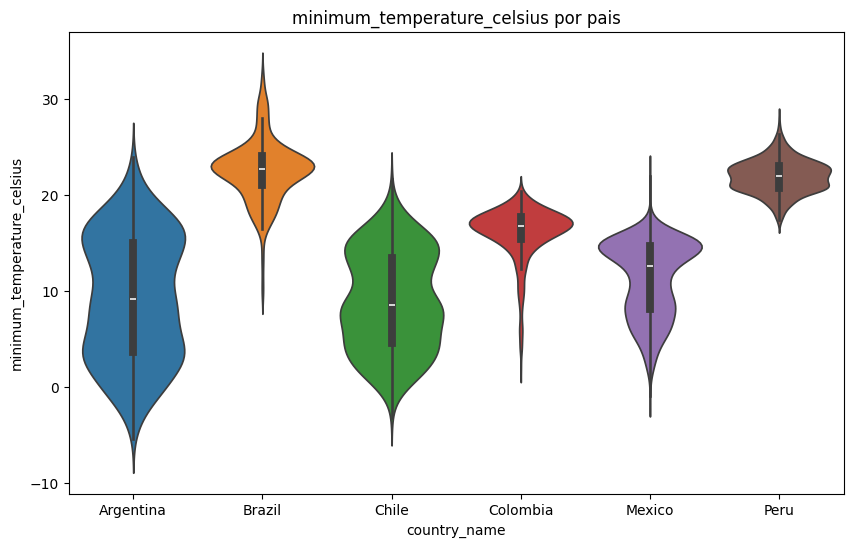

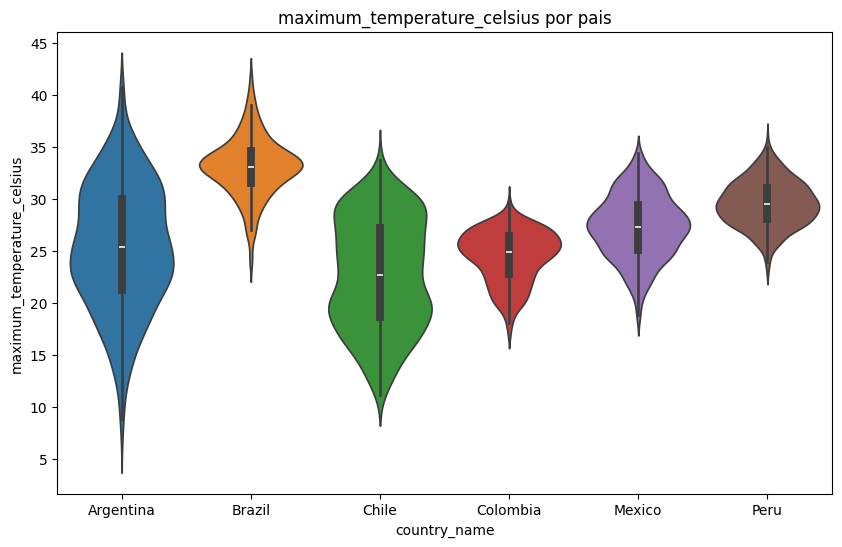

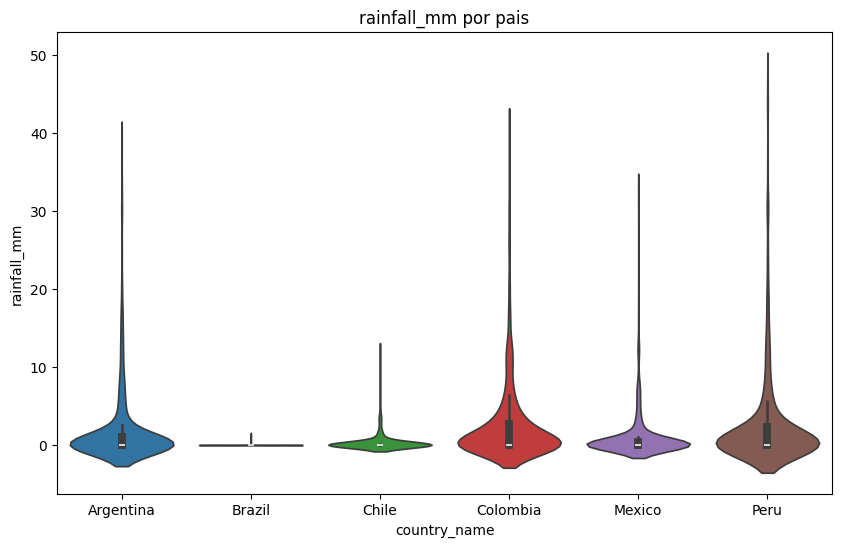

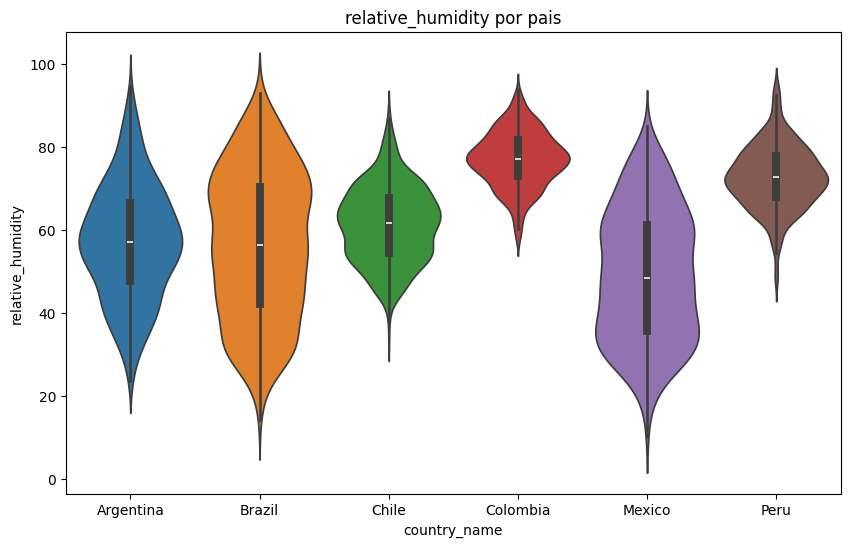

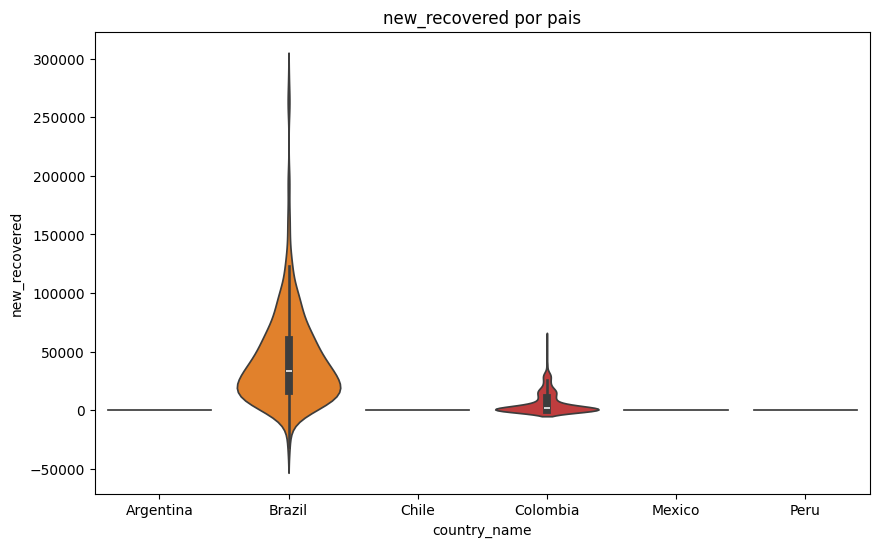

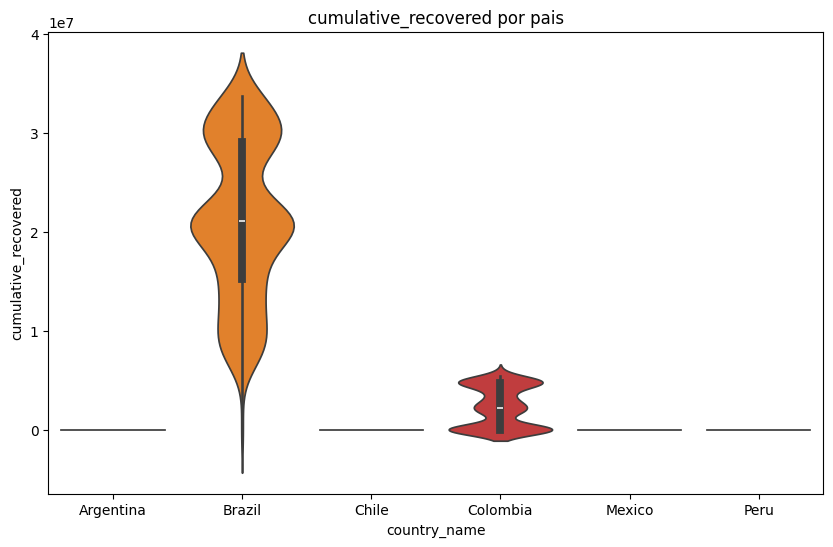

In [147]:
#se crea dataframe con columnas mayores a 6 porque son las que tienen valores  diferentes de cada pais:
columnas_mayores_6=[]
for i in df_filtrado_paises_fecha.columns:
    if i not in ["location_key", "date", "country_code", "latitude", "longitude"]:
        if df_filtrado_paises_fecha[i].nunique()>6:
            columnas_mayores_6.append(i)
#Esto es para encontrar valores unicos, varibiliadad, etc.


#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por pais:
columnas_mayores_6.append("country_name")

#se crea un dataframe con las columnas mayores a 6:
datos_finales_columnas_mayores_6=df_filtrado_paises_fecha[columnas_mayores_6]

#violinplot en todos los paises para variables numericas:
for i in datos_finales_columnas_mayores_6.columns:
    if i not in ["location_key", "date", "country_code", "latitude", "longitude" , "country_name"]:
        fig, ax=plt.subplots(figsize=(10,6))
        sns.violinplot(x="country_name", y=i, data=datos_finales_columnas_mayores_6, hue="country_name")
        plt.title(f"{i} por pais")
        plt.show

### Distribución de la población por grupos de edad

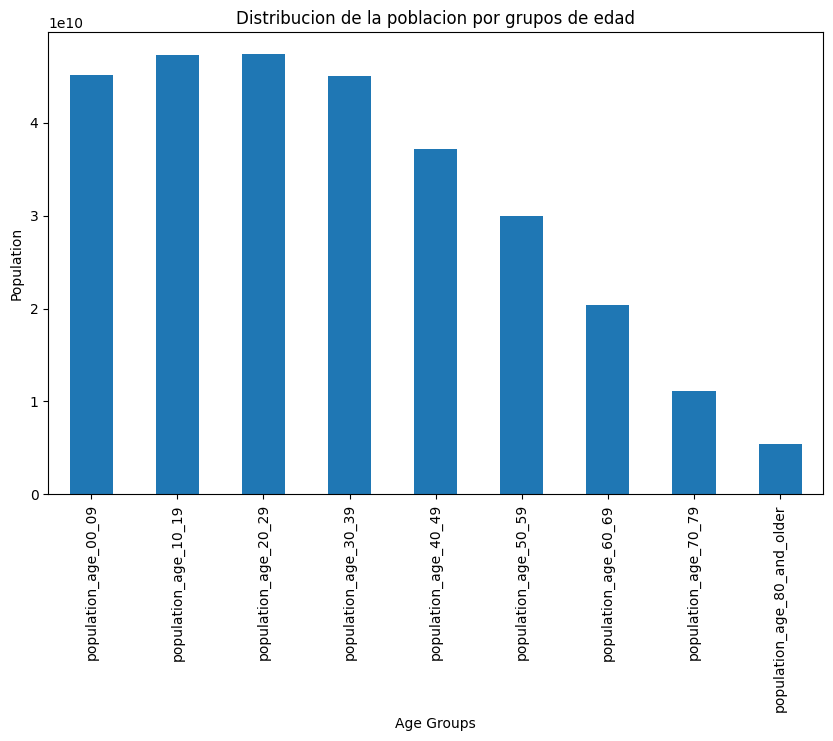

In [148]:
edades= ['population_age_00_09', 'population_age_10_19', 'population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
distribucion_edades = df_filtrado_paises_fecha[edades].sum()

plt.figure(figsize=(10, 6))
distribucion_edades.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribucion de la poblacion por grupos de edad')
plt.show()

Aqui vemos una distribucion de las edades en los Paises. En donde hay mas contagiados entre la edad de 10 años hasta 29 años

### Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

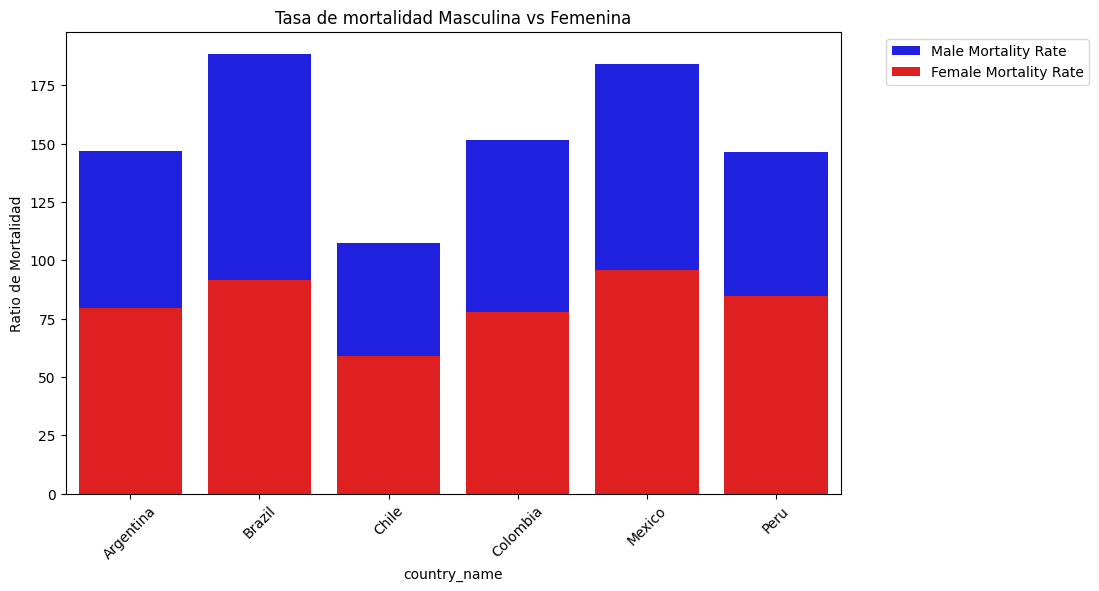

In [149]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_filtrado_paises_fecha,x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=df_filtrado_paises_fecha,x='country_name', y='adult_female_mortality_rate', color='red', label='Female Mortality Rate')
plt.xticks(rotation= 45)
plt.ylabel('Ratio de Mortalidad')
plt.title('Tasa de mortalidad Masculina vs Femenina')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Aqui tenemos una comparativa de la tasa de mortalidad entre la poblacion masculina y la poblacion femenina de cada pais. Podemos ver que en Peru por ejemplo hay mas mujeres que hombres

### Matriz de correlación de indicadores demográficos y de salud.

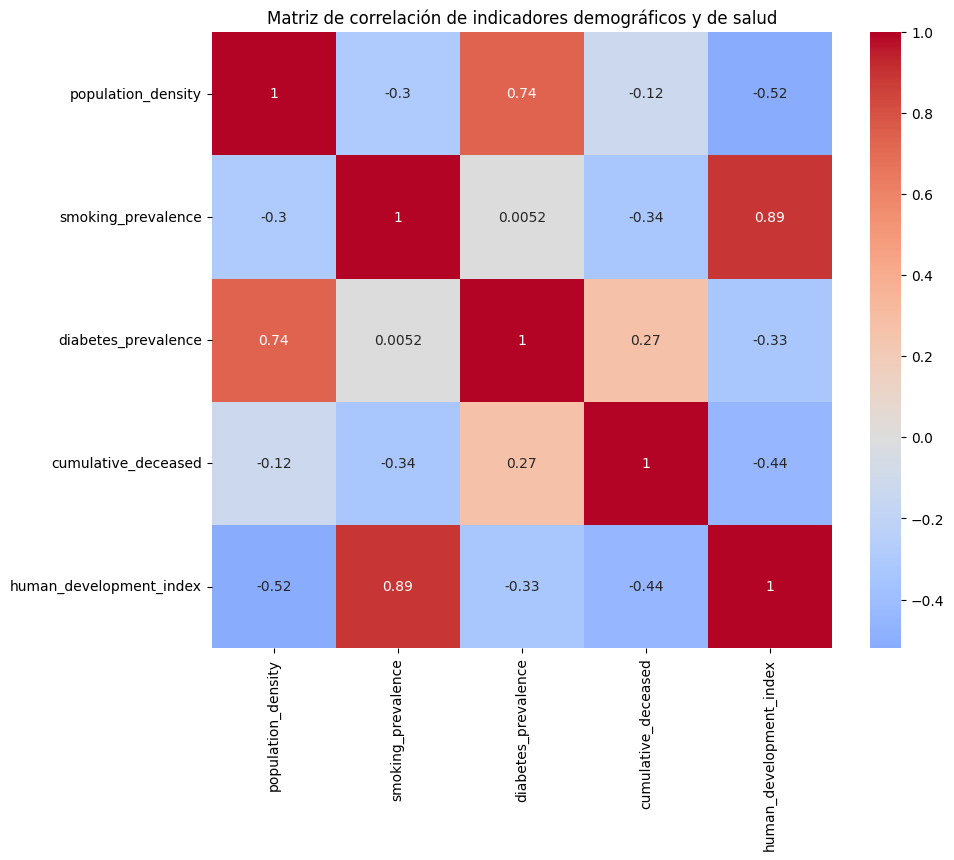

In [150]:
columnas= ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
matrix_correlacion = df_filtrado_paises_fecha[columnas].corr()
plt.figure(figsize=(10,8))
sns.heatmap(matrix_correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

Aqui podemos ver las correlaciones entre diferentes variables. Por ejemplo podemos ver que la densidad de la poblacion es inversamente proporcional a la prevalencia de fumar, pero la prevalencia de fumar es proporcional a la prevalencia de la diabetes.

### Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad

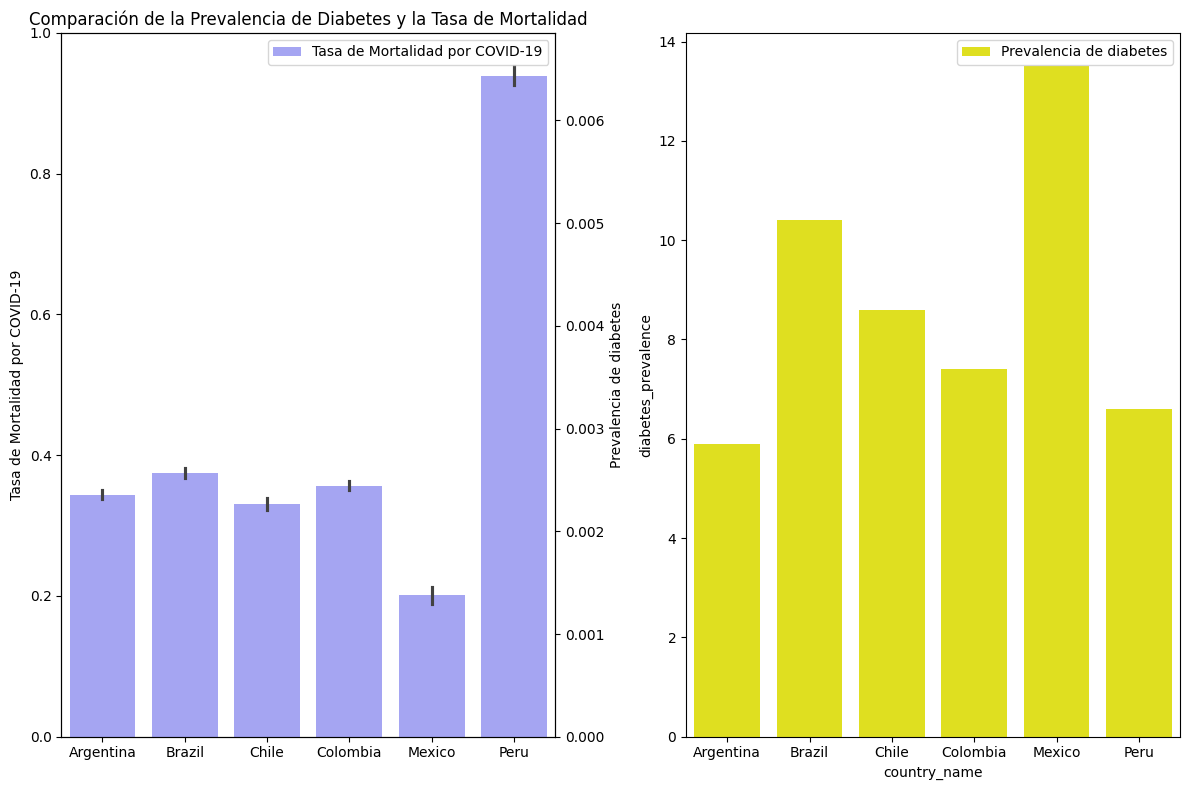

In [151]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize= (12,8))
sns.barplot(df_filtrado_paises_fecha, x=df_filtrado_paises_fecha['country_name'], y=df_filtrado_paises_fecha['diabetes_prevalence'], color='yellow', label='Prevalencia de diabetes')
ax2= ax.twinx() #Esto es para que la grafica 2 comparta los valores de x con la grafica 1
sns.barplot(df_filtrado_paises_fecha, x=df_filtrado_paises_fecha['country_name'], y=df_filtrado_paises_fecha['cumulative_deceased'] / df_filtrado_paises_fecha['population'], color='blue', label='Tasa de Mortalidad por COVID-19', ax=ax2, alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Tasa de Mortalidad por COVID-19')
ax2.set_ylabel('Prevalencia de diabetes')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad')
plt.tight_layout()
plt.show()



En estos dos graficos podemos ver que el indice de mortalidad mas alto lo tiene Peru pero Mexico tiene el indice de mortalidad mas bajo, sin embargo el indice de prevalencia de diabetes mas alto lo tiene Mexico y Peru tiene uno de los mas bajo.

### Avance 3

In [152]:
#Importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df_filtrado_paises_fecha = pd.read_csv('DatosFinalesFiltrados.csv')

### Evolución de Casos Activos vs. Recuperados

In [154]:
# Asegúrate de que la columna 'fecha' esté en formato datetime
df_filtrado_paises_fecha['date'] = pd.to_datetime(df_filtrado_paises_fecha['date'])

# Establecer la columna 'fecha' como índice
df_filtrado_paises_fecha.set_index('date', inplace=True)


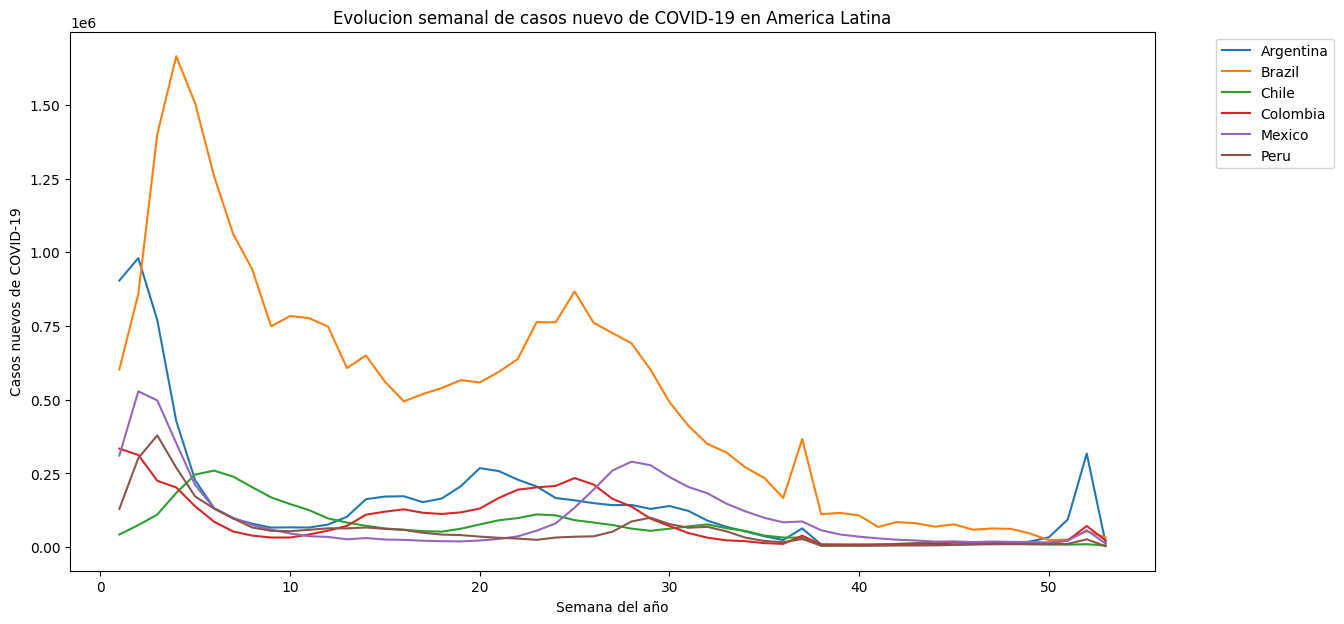

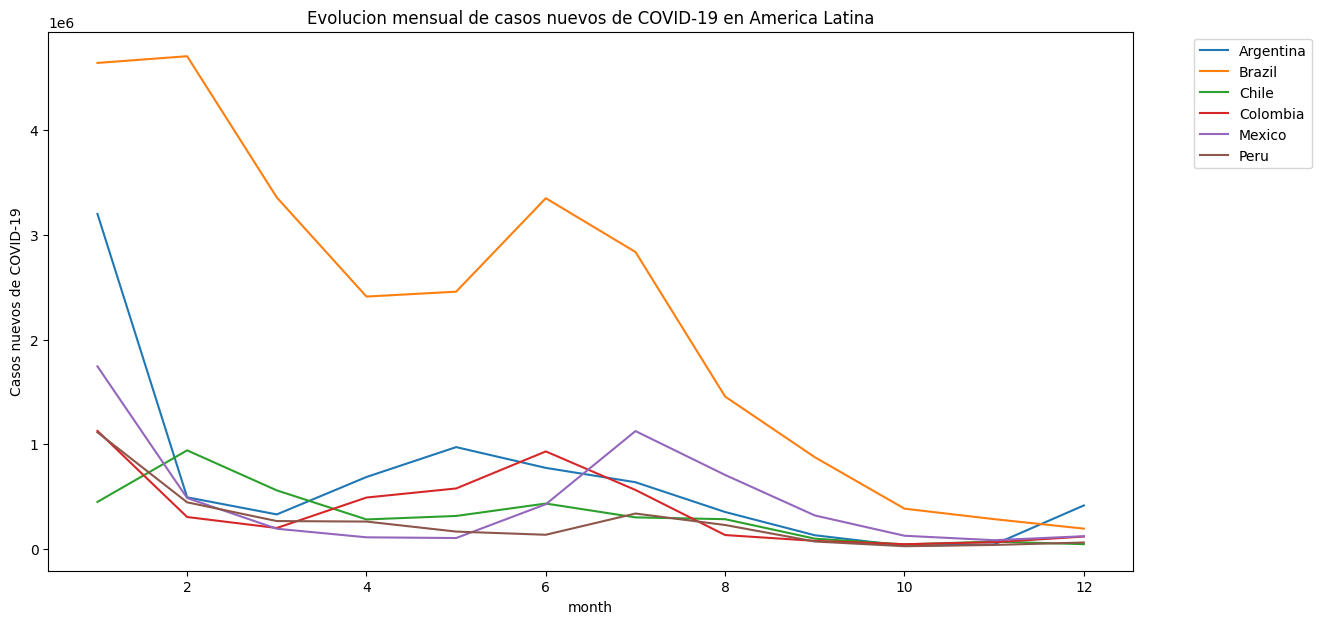

In [155]:
df_filtrado_paises_fecha['week']= df_filtrado_paises_fecha.index.isocalendar().week #Creamos una columna en el df con el numero de semana del año
df_filtrado_paises_fecha['year']= df_filtrado_paises_fecha.index.isocalendar().year 
casos_semana= df_filtrado_paises_fecha.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))
for pais in casos_semana['country_name'].unique():
    casos_semanales_pais = casos_semana[casos_semana['country_name']== pais]
    plt.plot(casos_semanales_pais['week'], casos_semanales_pais['new_confirmed'], label=pais)

plt.xlabel('Semana del año')
plt.ylabel('Casos nuevos de COVID-19')
plt.title('Evolucion semanal de casos nuevo de COVID-19 en America Latina')
plt.legend(bbox_to_anchor=(1.05,1), loc= 'upper left')
plt.show()

df_filtrado_paises_fecha['month']= df_filtrado_paises_fecha.index.month
casos_mensuales = df_filtrado_paises_fecha.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14,7))
for pais in casos_mensuales['country_name'].unique():
    casos_mensuales_pais = casos_mensuales[casos_mensuales['country_name']== pais]
    plt.plot(casos_mensuales_pais['month'], casos_mensuales_pais['new_confirmed'], label=pais)

plt.xlabel('month')
plt.ylabel('Casos nuevos de COVID-19')
plt.title('Evolucion mensual de casos nuevos de COVID-19 en America Latina')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

### Tasa de crecimiento

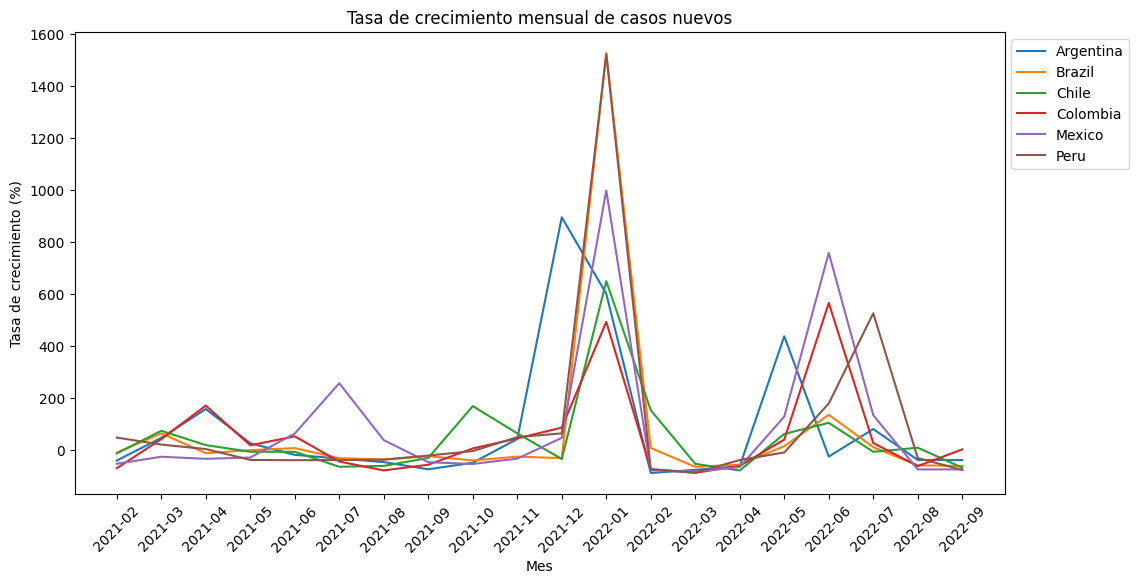

In [156]:


# Agrupar por país y mes, y sumar los casos nuevos confirmados
df_filtrado_paises_fecha['month'] = df_filtrado_paises_fecha.index.to_period('M')
casos_mensuales = df_filtrado_paises_fecha.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()

# Calcular la tasa de crecimiento mensual. Se utiliza pct_change() para calcular el cambio porcentual entre meses consecutivos.
casos_mensuales['growth_rate'] = casos_mensuales.groupby('country_name')['new_confirmed'].pct_change() * 100

# Configuración de la visualización
plt.figure(figsize=(12,6))

# Iterar sobre cada país para graficar la tasa de crecimiento
for pais in casos_mensuales['country_name'].unique():
    casos_mensuales_por_pais = casos_mensuales[casos_mensuales['country_name'] == pais]
    plt.plot(casos_mensuales_por_pais['month'].astype(str), casos_mensuales_por_pais['growth_rate'], label=pais)

# Etiquetas y título del gráfico
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.ylabel("Tasa de crecimiento (%)")
plt.title("Tasa de crecimiento mensual de casos nuevos")
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

### Progreso de la vacunación por país

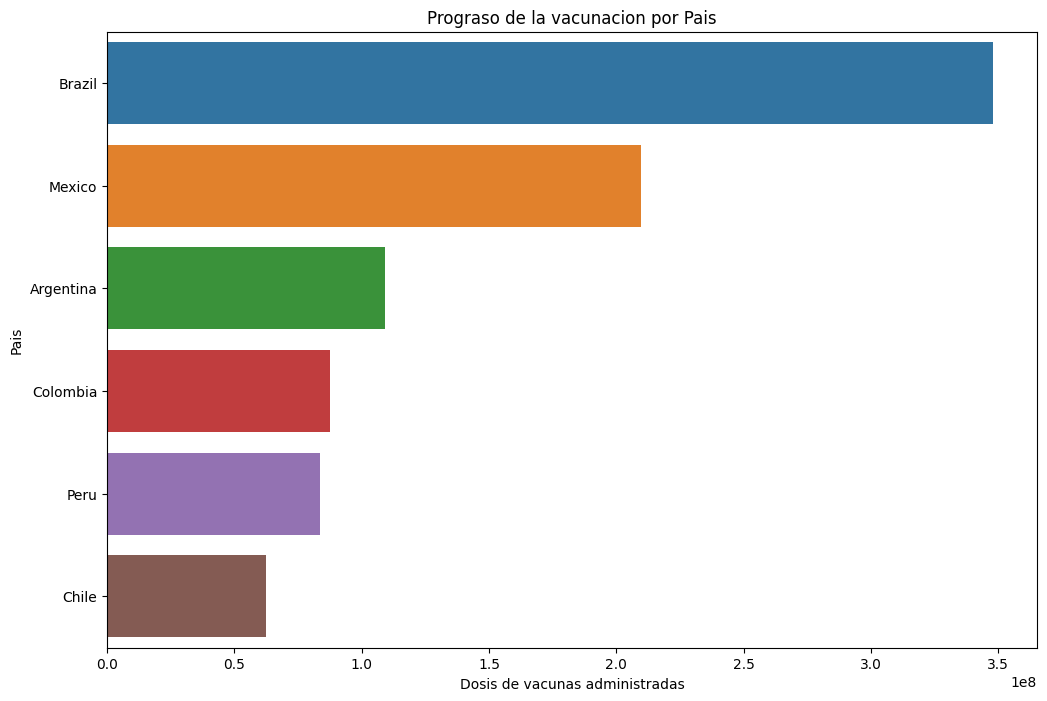

In [157]:
vaccination_data = df_filtrado_paises_fecha.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index)
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('Pais')
plt.title('Prograso de la vacunacion por Pais')
plt.show()


### Nuevos casos y temperatura promedio

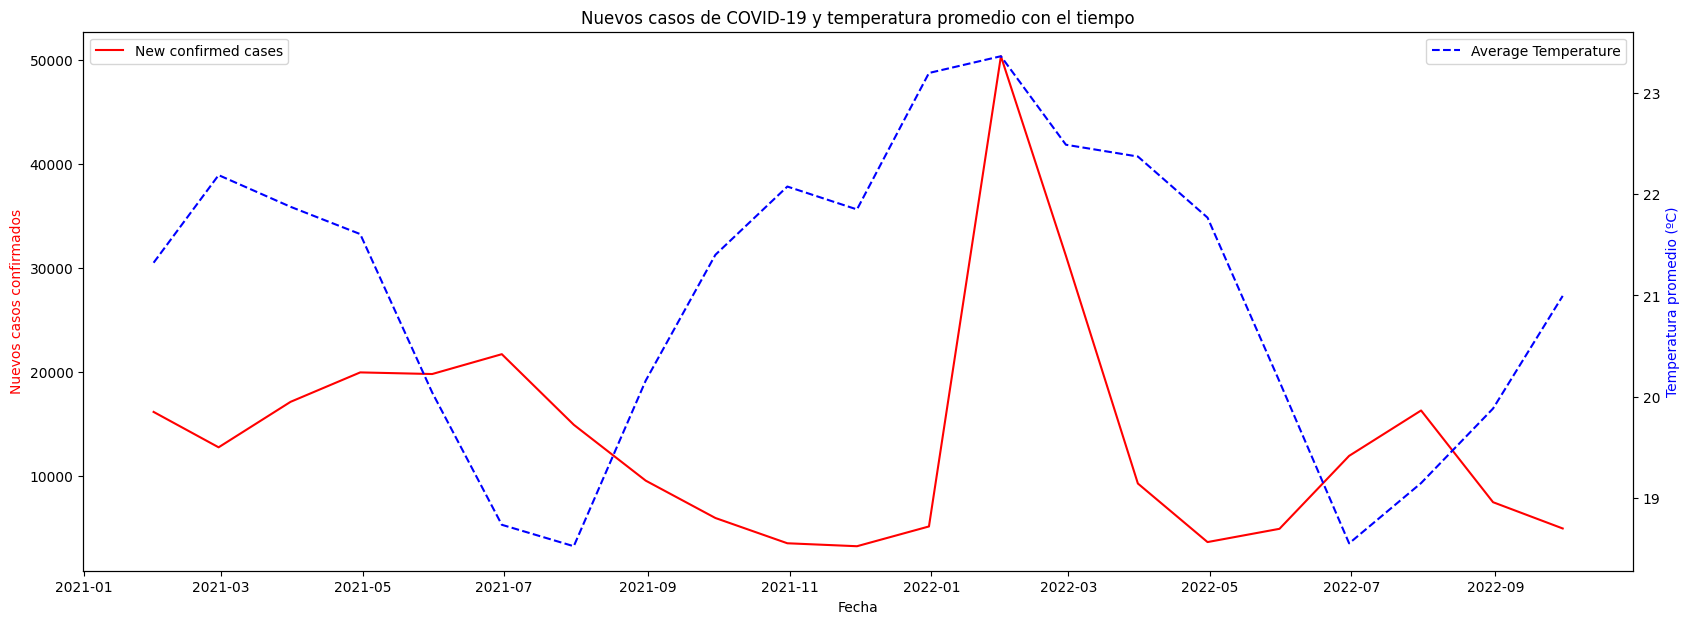

In [158]:
plt.figure(figsize=(20, 7))
ax1= plt.gca()
ax2= ax1.twinx()

ax1.plot(df_filtrado_paises_fecha.resample('ME').mean(numeric_only=True).index, df_filtrado_paises_fecha.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red',label='New confirmed cases')
ax2.plot(df_filtrado_paises_fecha.resample('ME').mean(numeric_only=True).index, df_filtrado_paises_fecha.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue',label='Average Temperature', linestyle= '--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio (ºC)', color='blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc= 'upper right')
plt.show()

Podemos ver que a medias de 2021-11, ya habia bajado las temperaturas de los pacientes. Pero luego en 2022-01, se volvio a disparar las temperaturas, esto puede ser por que en esa epoca hay muchos eventos y fiestas, entonces la gente se volvio a contagiar.

### Impacto de la Urbanización en la Propagación del Covid-19

In [159]:
df_filtrado_paises_fecha['urban_population_percentage'] = (df_filtrado_paises_fecha['population_urban'] / df_filtrado_paises_fecha['population']) * 100

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1860\3071125089.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index,palette='viridis')


Text(0.5, 1.0, 'Impacto de la urbanizacion en la propagacion del COVID-19 en America Latina')

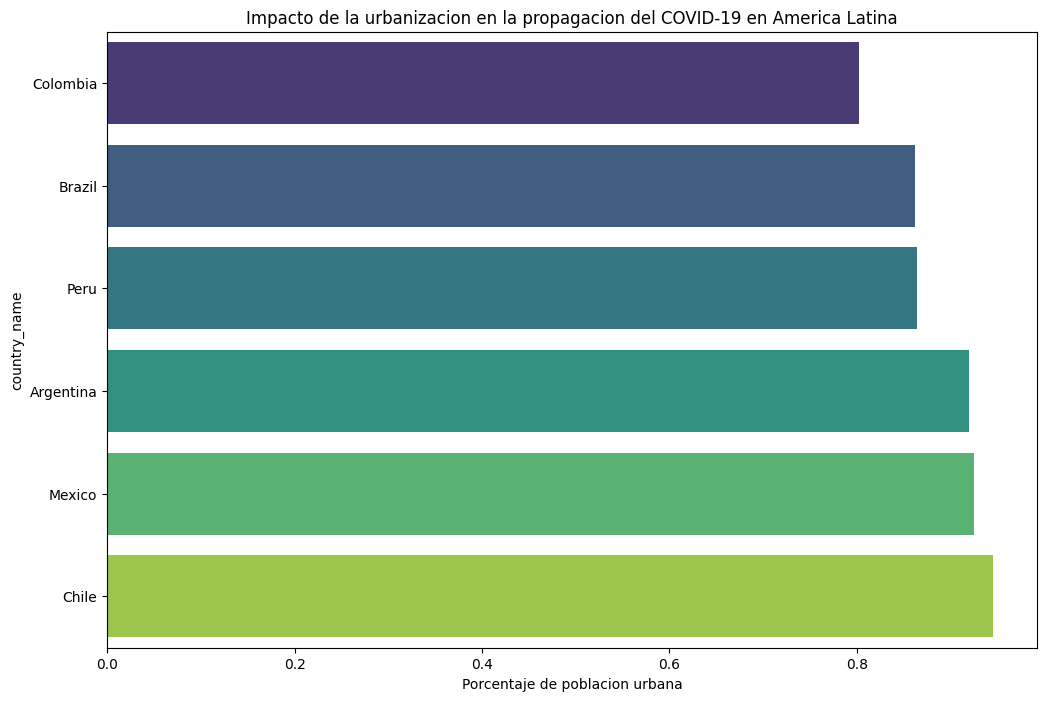

In [160]:
df_filtrado_paises_fecha['urban_population_percentage'] = df_filtrado_paises_fecha['population_urban'] / df_filtrado_paises_fecha['population']
urban_cases = df_filtrado_paises_fecha.groupby('country_name').last().sort_values(by= 'urban_population_percentage')

plt.figure(figsize=(12, 8))
sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index,palette='viridis')
plt.xlabel('Porcentaje de poblacion urbana')
plt.title('Impacto de la urbanizacion en la propagacion del COVID-19 en America Latina')

Vemos que chile esta con el mayor porcentaje de propagacion en las zonas mas urbanas, esto tal vez por que se debe concentrar mayor la poblacion en esos lugares, o que tal vez al ser tan chico se contagian mas rapido. En cambio Colombia tiene menos porcentaje, ya que tal vez estan mas distribuidos

### Distribución de la Población por Edad en Países

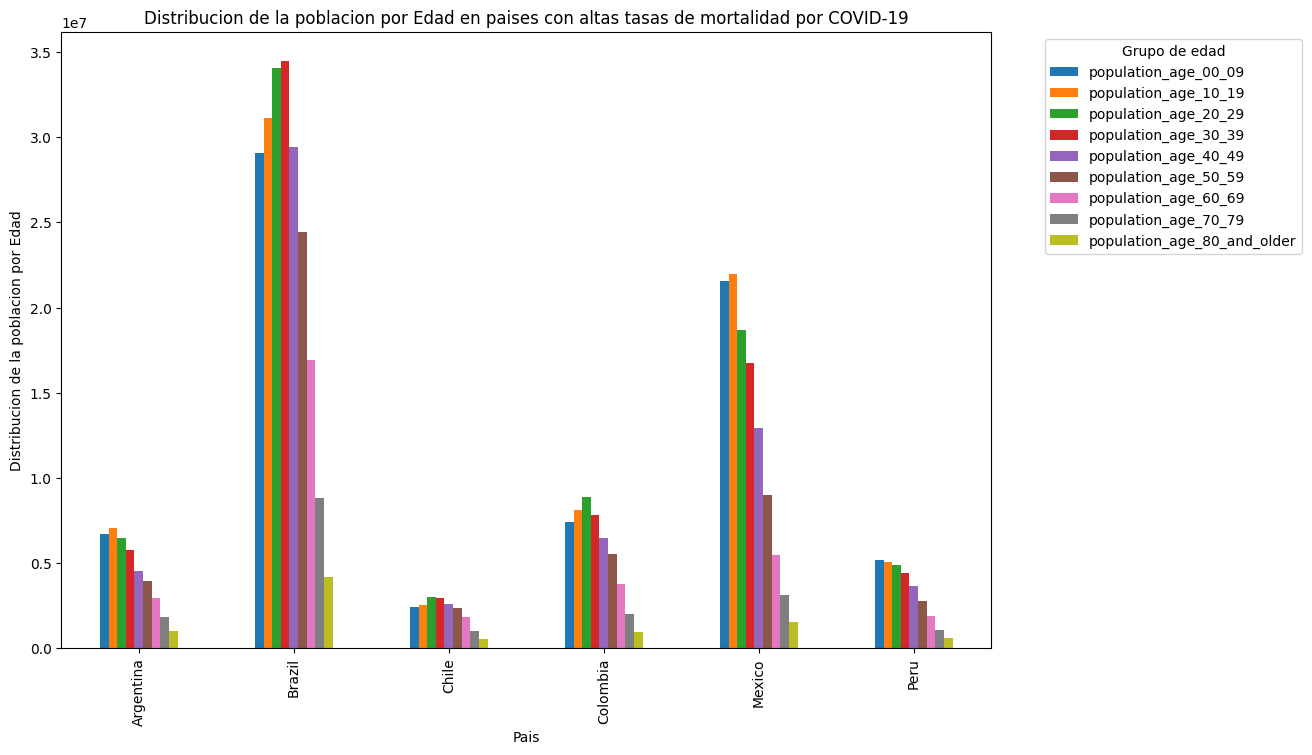

In [161]:
mortalidad_paises= df_filtrado_paises_fecha.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(6).index
grupo_edades= ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
            'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
            'population_age_60_69', 'population_age_70_79',
            'population_age_80_and_older']
distribucion_edades= df_filtrado_paises_fecha[df_filtrado_paises_fecha['country_name'].isin(mortalidad_paises)].groupby('country_name')[grupo_edades].mean()

distribucion_edades.plot(kind='bar', stacked=False, figsize=(12,8))
plt.xlabel('Pais')
plt.ylabel('Distribucion de la poblacion por Edad')
plt.title('Distribucion de la poblacion por Edad en paises con altas tasas de mortalidad por COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc= 'upper left', title= 'Grupo de edad')
plt.show()

Si bien vemos que Brasil tiene el indice de mortalidad mas alto, tambien vemos que las personas de entre 30 y 39 años son los que mas mortalidad tienen. Esto debe ser por que tal vez son los mas expuestos a la enfermedad

### Comparación de Estrategias de Vacunación en América Latina

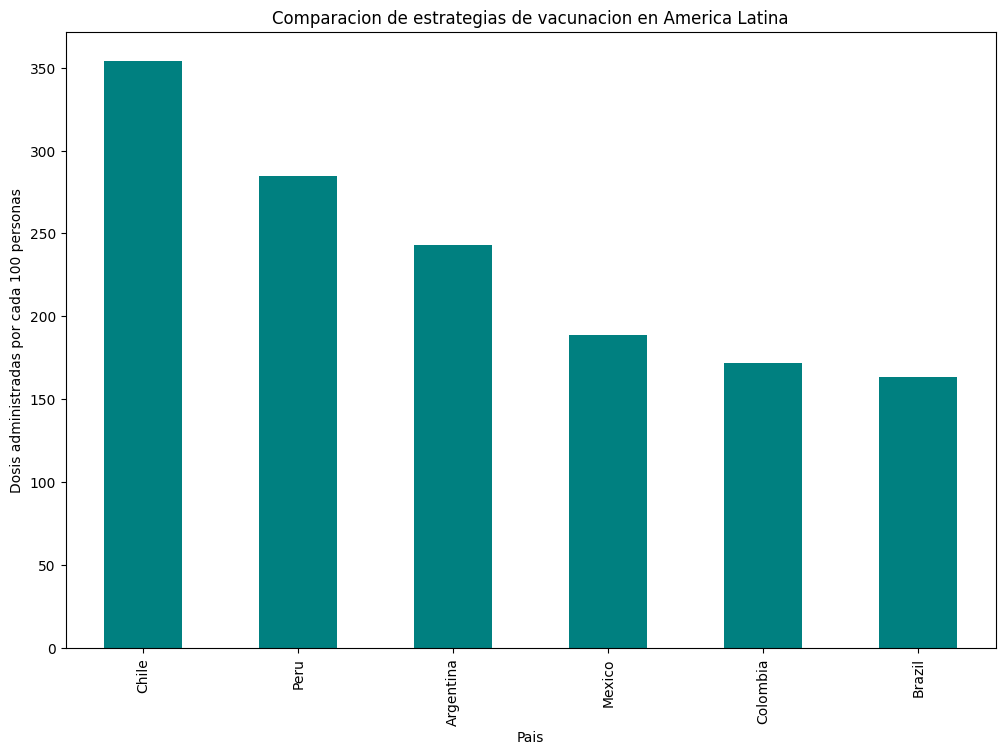

In [162]:
estrategia_vacunacion = df_filtrado_paises_fecha.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / df_filtrado_paises_fecha.groupby('country_name')['population'].max() * 100
estrategia_vacunacion.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal')
plt.xlabel('Pais')
plt.ylabel('Dosis administradas por cada 100 personas')
plt.title('Comparacion de estrategias de vacunacion en America Latina')
plt.show()

Vemos que Chile tuvo una mejor distribucion de vacunas, ya que cada 100 personas repartian 350 vacunas. Esto tal vez ayudo a controlar mejor la pandemia en Chile

### Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

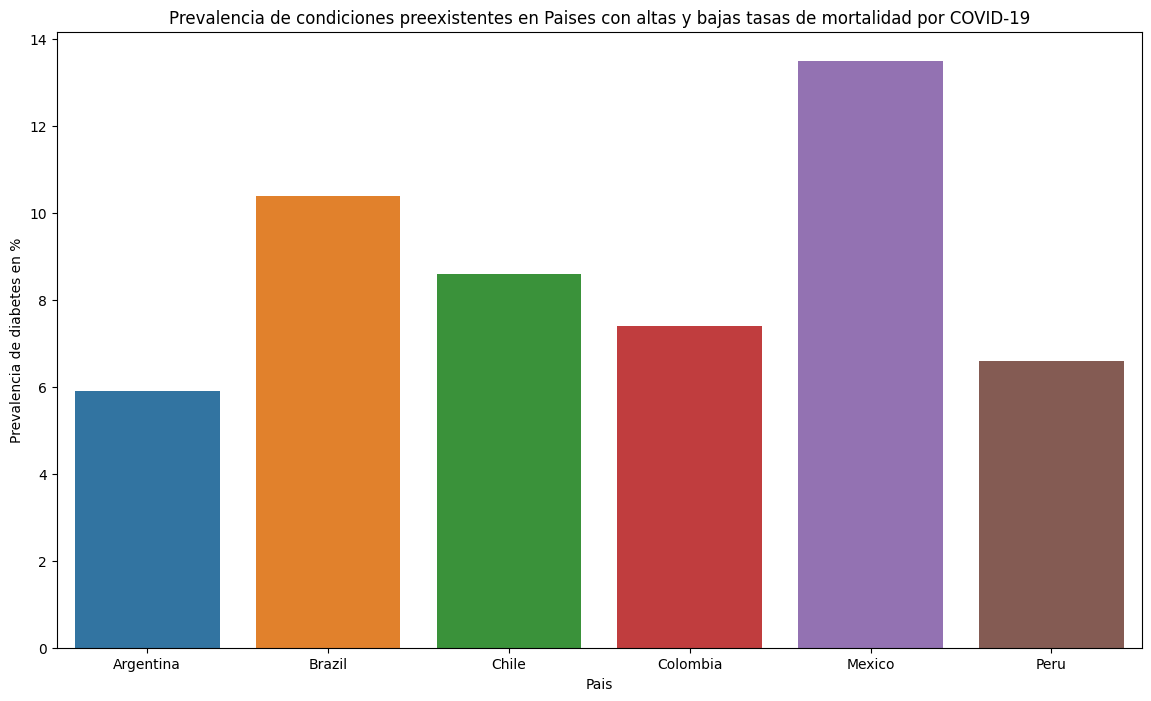

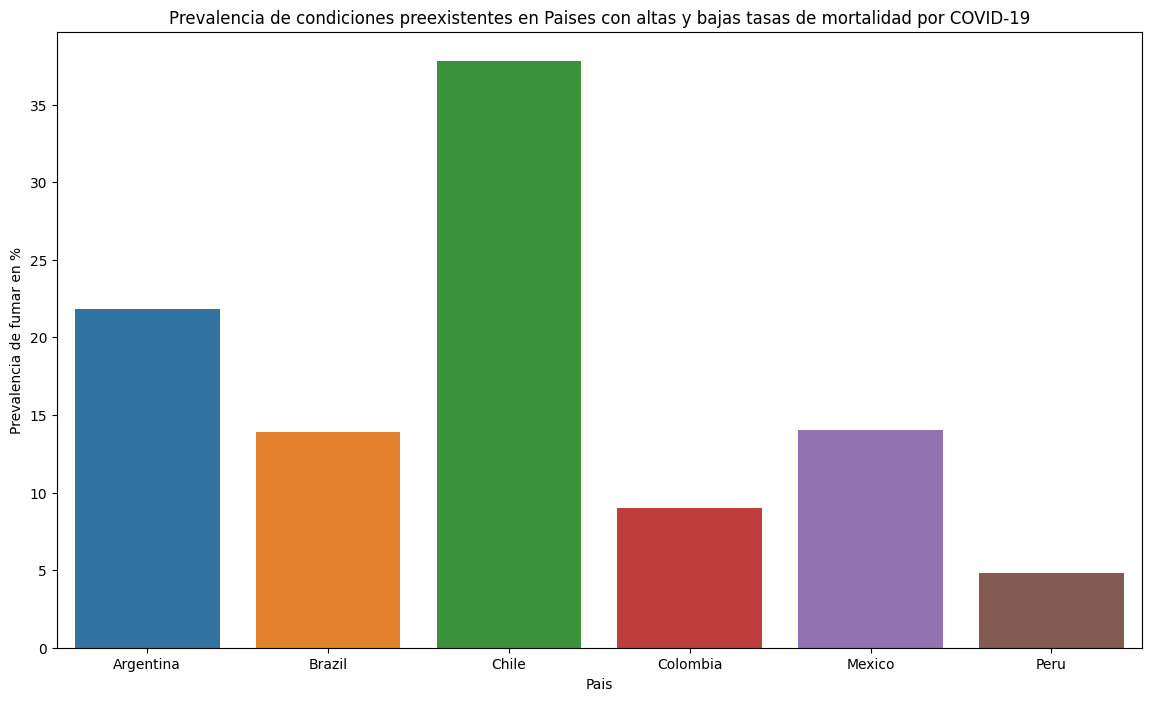

In [163]:
top_paises = df_filtrado_paises_fecha.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
peores_paises = df_filtrado_paises_fecha.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
condicion= df_filtrado_paises_fecha[df_filtrado_paises_fecha['country_name'].isin(top_paises.union(peores_paises))]

plt.figure(figsize=(14, 8))
sns.barplot(data= condicion, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de diabetes en %')
plt.title('Prevalencia de condiciones preexistentes en Paises con altas y bajas tasas de mortalidad por COVID-19')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(data= condicion, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de fumar en %')
plt.title('Prevalencia de condiciones preexistentes en Paises con altas y bajas tasas de mortalidad por COVID-19')
plt.show()

Vemos en el primer grafico que Mexico es el pais con la prevalencia de diabetes mas alta. Pero Chile es el pais con la prevalencia de fumar mas alta. Esto debe ser por su estilos de vidas o sus costumbres

### Relación entre la Cobertura de Vacunación y la Reducción de Casos

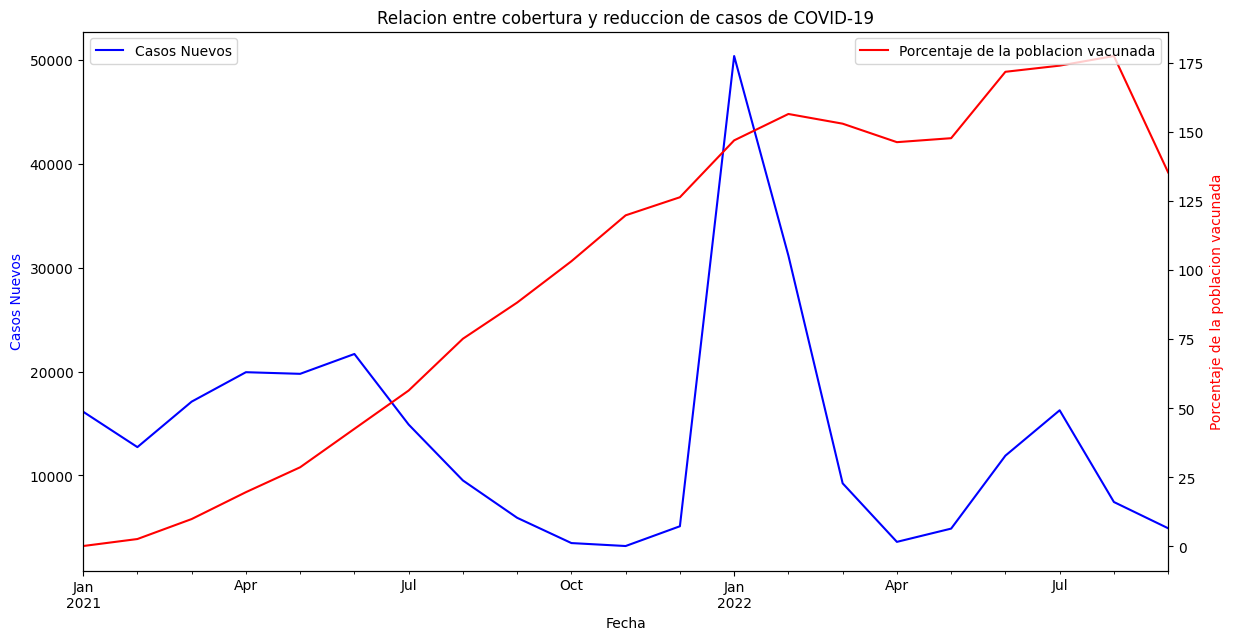

In [164]:
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#Creacion de porcentaje de vacunacion 
df_filtrado_paises_fecha['percentage_vacunated'] = (df_filtrado_paises_fecha['cumulative_vaccine_doses_administered'] / df_filtrado_paises_fecha['population']) * 100
df_filtrado_paises_fecha.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label= 'Casos Nuevos')
df_filtrado_paises_fecha.resample('ME').mean(numeric_only=True)['percentage_vacunated'].plot(ax=ax2, color='red', label= 'Porcentaje de la poblacion vacunada')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color= 'blue')
ax2.set_ylabel('Porcentaje de la poblacion vacunada', color='red')
ax1.set_title('Relacion entre cobertura y reduccion de casos de COVID-19')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Como vemos el porcentaje de la poblacion vacunada fue aumentando, pero luego disminuyo por que muchas veces sucede que las personas ya se sienten bien y dejan de ir a hospitales a vacunarse
Y como vemos en los casos nuevos casi siempre se dan en epocas donde hay eventos festivos como navidad, año nuevo, etc.

### Análisis Temporal de la Mortalidad

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1860\4011603234.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_filtrado_paises_fecha, x='date', y='mortality_rate', estimator='mean', ci=None)


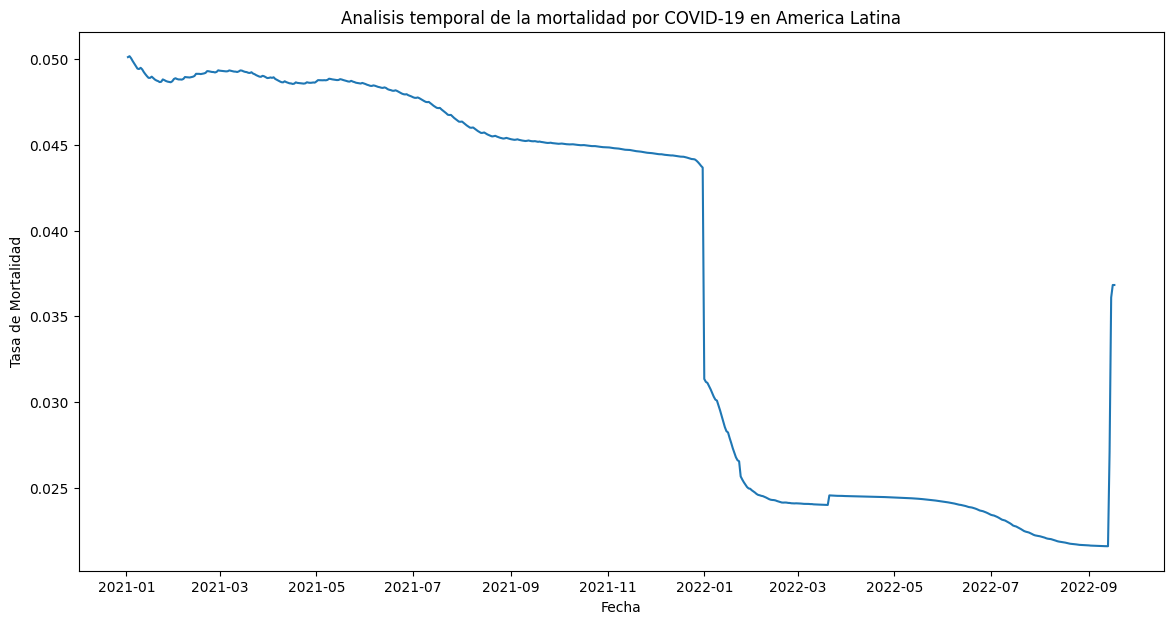

In [165]:
df_filtrado_paises_fecha['mortality_rate'] = df_filtrado_paises_fecha['cumulative_deceased'] / df_filtrado_paises_fecha['cumulative_confirmed']


plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtrado_paises_fecha, x='date', y='mortality_rate', estimator='mean', ci=None)
plt.title('Analisis temporal de la mortalidad por COVID-19 en America Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

Este grafico tiene unos problemas por que muchos de los datos que tenia eran Nan, entonces por eso es medio inestable

### Evolución de Casos Activos vs. Recuperados

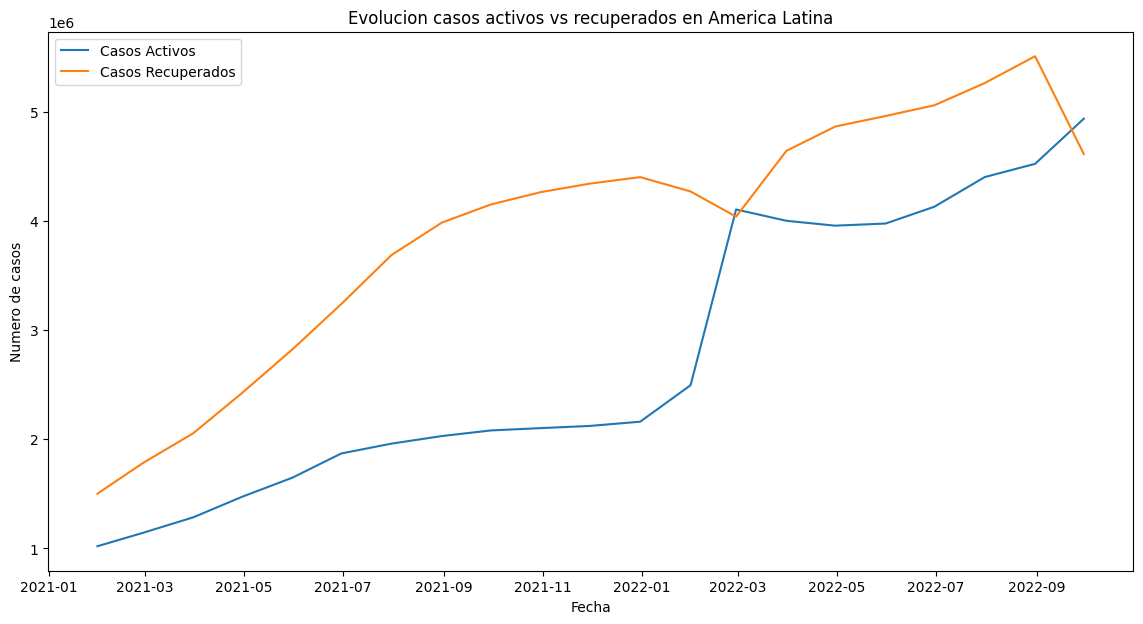

In [166]:
df_filtrado_paises_fecha['active_cases'] = df_filtrado_paises_fecha['cumulative_confirmed'] - df_filtrado_paises_fecha['cumulative_deceased'] - df_filtrado_paises_fecha['cumulative_recovered']
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtrado_paises_fecha.resample('ME').mean(numeric_only=True), x='date', y= 'active_cases', label='Casos Activos')
sns.lineplot(data=df_filtrado_paises_fecha.resample('ME').mean(numeric_only=True), x='date', y= 'cumulative_recovered', label='Casos Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Numero de casos')
plt.title('Evolucion casos activos vs recuperados en America Latina')
plt.legend()
plt.show()

Vemos que si bien los casos activos y los recuperados en algun momento estuvieron iguales, luego los casos recuperados aumentaron pero caen drasticamente en el final y los casos activos empiezan a subir de nuevo. Esto puede ser por que el dataframe que manejamos no es muy estable.

### Comparación de la Situación Actual

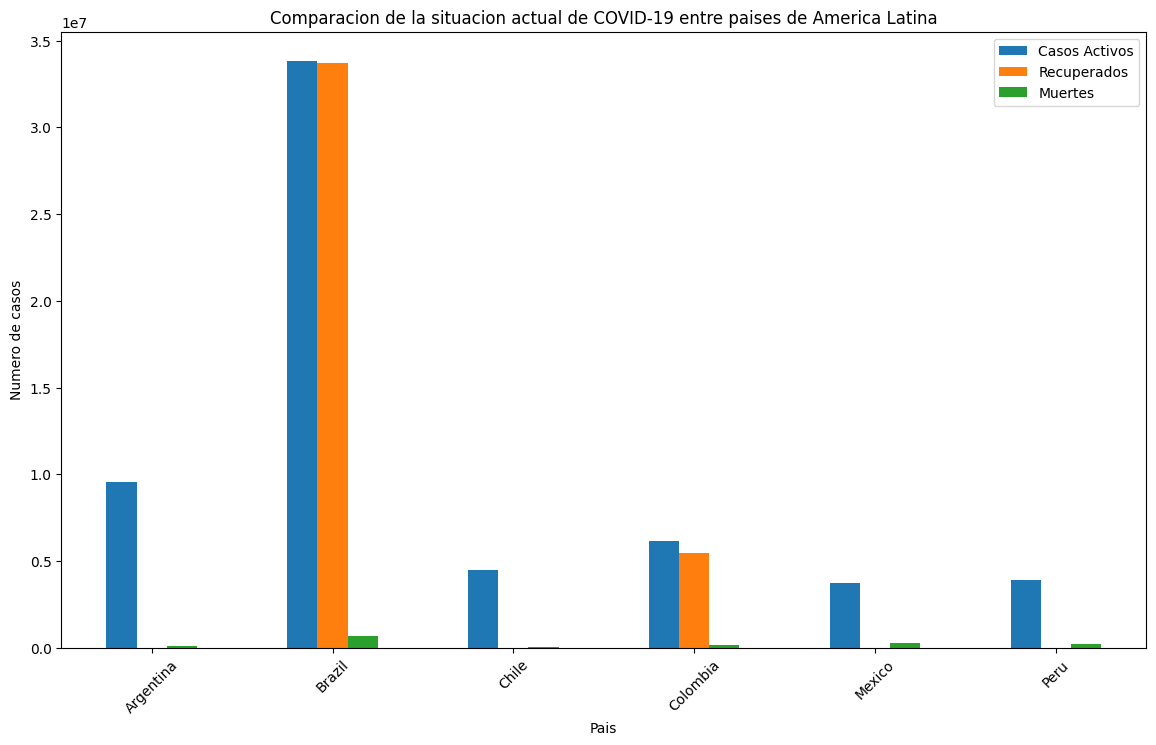

In [167]:
situacion_actual = df_filtrado_paises_fecha.groupby('country_name').max()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]
situacion_actual.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparacion de la situacion actual de COVID-19 entre paises de America Latina')
plt.xlabel('Pais')
plt.ylabel('Numero de casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation= 45)
plt.show()

In [168]:
df_filtrado_paises_fecha.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 